In [1]:
import pandas as pd
pd.__version__

'1.1.5'

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

# Read Raw Matrix

github/ucsffrancislab/genomics/data/20200603-TCGA-GBMLGG-WGS/20201029-hkle-chimera/create_count_matrix.bash

In [4]:
cm=pd.read_csv("count_matrix2.csv.gz")
cm.rename(columns={"subject": "sample"},inplace=True)

In [5]:
cm['subject']=cm['sample'].astype(str).str[0:7]

In [6]:
cm.shape

(274, 311)

In [7]:
cm.head()

,sample,raw pair count,HERVK113 unpaired reads aligned,HERVK113 unpaired human Q00 aligned,uniq HERVK113 unpaired human Q00 aligned,r10 uniq HERVK113 unpaired human Q00 aligned,r100 uniq HERVK113 unpaired human Q00 aligned,r1000 uniq HERVK113 unpaired human Q00 aligned,r10000 uniq HERVK113 unpaired human Q00 aligned,r100000 uniq HERVK113 unpaired human Q00 aligned,...,r10000 uniq SVA_F paired human Q10 aligned,r100000 uniq SVA_F paired human Q10 aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
0,02-2483-01A,566024474,5217,5099,2469,2451,2441,2420,2286,2286,...,1187,1187,2170,1474,1359,1303,1290,1170,1170,02-2483
1,02-2483-10A,579304076,4735,4646,2212,2202,2192,2175,2037,2037,...,1090,1090,1878,1321,1222,1177,1170,1076,1076,02-2483
2,02-2485-01A,575060540,5140,5047,2419,2402,2392,2374,2229,2229,...,1184,1184,2217,1443,1326,1268,1261,1167,1167,02-2485
3,02-2485-10A,478851061,3895,3849,1947,1935,1928,1914,1783,1783,...,1108,1108,1860,1325,1231,1189,1184,1094,1094,02-2485
4,06-0125-01A,1066268796,8464,8384,3521,3497,3483,3450,3292,3292,...,1810,1810,5507,2700,2293,2099,2068,1794,1794,06-0125


# Really only interested in the paired / Q20 data so dump the rest

In [8]:
cm = cm[cm.columns.drop(list(cm.filter(regex='unpaired')))]
cm = cm[cm.columns.drop(list(cm.filter(regex='Q00')))]
cm = cm[cm.columns.drop(list(cm.filter(regex='Q10')))]

In [9]:
list(cm)

['sample',
 'raw pair count',
 'HERVK113 paired reads aligned',
 'HERVK113 paired human Q20 aligned',
 'uniq HERVK113 paired human Q20 aligned',
 'r10 uniq HERVK113 paired human Q20 aligned',
 'r100 uniq HERVK113 paired human Q20 aligned',
 'r1000 uniq HERVK113 paired human Q20 aligned',
 'r10000 uniq HERVK113 paired human Q20 aligned',
 'r100000 uniq HERVK113 paired human Q20 aligned',
 'SVA_A paired reads aligned',
 'SVA_A paired human Q20 aligned',
 'uniq SVA_A paired human Q20 aligned',
 'r10 uniq SVA_A paired human Q20 aligned',
 'r100 uniq SVA_A paired human Q20 aligned',
 'r1000 uniq SVA_A paired human Q20 aligned',
 'r10000 uniq SVA_A paired human Q20 aligned',
 'r100000 uniq SVA_A paired human Q20 aligned',
 'SVA_B paired reads aligned',
 'SVA_B paired human Q20 aligned',
 'uniq SVA_B paired human Q20 aligned',
 'r10 uniq SVA_B paired human Q20 aligned',
 'r100 uniq SVA_B paired human Q20 aligned',
 'r1000 uniq SVA_B paired human Q20 aligned',
 'r10000 uniq SVA_B paired human 

In [10]:
cm[['subject','sample']].head()

,subject,sample
0,02-2483,02-2483-01A
1,02-2483,02-2483-10A
2,02-2485,02-2485-01A
3,02-2485,02-2485-10A
4,06-0125,06-0125-01A


# Note that this subject only has a normal sample?

In [11]:
cm[cm['subject']=='CS-5390']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
84,CS-5390-10A,529225224,2814,1161,580,568,559,553,459,459,...,1420,4288,1290,958,921,901,894,835,835,CS-5390


In [12]:
cm.shape

(274, 59)

In [13]:
cm=cm[(cm['sample'].str.contains("-01.$") | cm['sample'].str.contains("-10.$") )]

In [14]:
cm.shape

(246, 59)

In [15]:
cm[cm['subject']=='CS-5390']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
84,CS-5390-10A,529225224,2814,1161,580,568,559,553,459,459,...,1420,4288,1290,958,921,901,894,835,835,CS-5390


In [16]:
cm[cm['subject']=='FG-5963']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject
194,FG-5963-01A,214570635,186,75,68,68,68,68,68,68,...,193,312,79,76,76,75,75,74,74,FG-5963


# Get rid of these 2 isolated samples

In [17]:
cm=cm[((cm['subject']!='CS-5390') & (cm['subject']!='FG-5963'))]

In [18]:
cm.shape

(244, 59)

In [19]:
cm[cm['subject']=='CS-5390']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject


In [20]:
cm[cm['subject']=='FG-5963']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,r100000 uniq SVA_E paired human Q20 aligned,SVA_F paired reads aligned,SVA_F paired human Q20 aligned,uniq SVA_F paired human Q20 aligned,r10 uniq SVA_F paired human Q20 aligned,r100 uniq SVA_F paired human Q20 aligned,r1000 uniq SVA_F paired human Q20 aligned,r10000 uniq SVA_F paired human Q20 aligned,r100000 uniq SVA_F paired human Q20 aligned,subject


# Read Metadata

In [21]:
mt=pd.read_csv("metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['submitter','days_to_death','gender','disease_type','center_name'])

In [22]:
mt.shape

(127, 5)

In [23]:
mt.head()

,submitter,days_to_death,gender,disease_type,center_name
0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


# Read Metadata 2

In [24]:
mt2=pd.read_csv("TCGA.Glioma.metadata.tsv",sep="\t")

In [25]:
mt2.shape

(1114, 18)

In [26]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.762054,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.731106,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.334941,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.333034,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.162705,1.0


In [27]:
mt2['primary_diagnosis'].unique()

array(['Glioblastoma', 'Astrocytoma, NOS', 'Astrocytoma, anaplastic',
       'Oligodendroglioma, NOS', 'Mixed glioma',
       'Oligodendroglioma, anaplastic'], dtype=object)

In [28]:
mt2['subject2']=mt2['case_submitter_id'].astype(str).str[5:12]

In [29]:
mt2[['subject2','case_submitter_id']].head()

,subject2,case_submitter_id
0,02-0001,TCGA-02-0001
1,02-0003,TCGA-02-0003
2,02-0004,TCGA-02-0004
3,02-0006,TCGA-02-0006
4,02-0007,TCGA-02-0007


In [30]:
#mt2.loc[mt2['TERT'].isna(), 'TERT'] = 'NAN' 
#mt2.loc[mt2['IDH'].isna(), 'IDH'] = 'NAN' 
#mt2.loc[mt2['x1p19q'].isna(), 'x1p19q'] = 'NAN' 

In [31]:
meta=mt2.merge(mt,left_on='subject2',right_on='submitter',suffixes=["_mt2","_mt"],how='inner')

In [32]:
meta.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender_mt2,RE_names,IDH,x1p19q,TERT,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name
0,TCGA-02-2483,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,...,Methylated,43.0,15.310383,0.0,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,TCGA-02-2485,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,...,Unmethylated,53.0,15.441803,0.0,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,TCGA-06-0125,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,...,Methylated,63.0,47.573895,1.0,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,TCGA-06-0152,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,...,NaN,68.0,12.320588,1.0,06-0152,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,TCGA-06-0157,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,...,NaN,63.0,3.186925,1.0,06-0157,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [33]:
meta.shape

(127, 24)

In [34]:
meta['project_id'].unique()

array(['TCGA-GBM', 'TCGA-LGG'], dtype=object)

In [35]:
meta['TERT'].unique()

array(['WT', 'Mutant', nan], dtype=object)

In [36]:
meta['IDH'].unique()

array(['Mutant', 'WT', nan], dtype=object)

# Merge

In [37]:
cm.shape

(244, 59)

In [38]:
meta.shape

(127, 24)

In [39]:
merged=cm.merge(meta,left_on='subject',right_on='submitter',suffixes=["_cm","_meta"],how='inner')

In [40]:
merged.shape

(248, 83)

In [41]:
merged[merged['subject']=='CS-6186']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name
78,CS-6186-01A,903668222,11796,3763,1169,1134,1111,1100,895,895,...,Unmethylated,58.0,17.675936,1.0,CS-6186,CS-6186,538.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
79,CS-6186-01A,903668222,11796,3763,1169,1134,1111,1100,895,895,...,Unmethylated,58.0,17.675936,1.0,CS-6186,CS-6186,538.0,male,Brain Lower Grade Glioma,Harvard Medical School
80,CS-6186-10A,519547041,6900,2420,1020,974,959,950,786,786,...,Unmethylated,58.0,17.675936,1.0,CS-6186,CS-6186,538.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
81,CS-6186-10A,519547041,6900,2420,1020,974,959,950,786,786,...,Unmethylated,58.0,17.675936,1.0,CS-6186,CS-6186,538.0,male,Brain Lower Grade Glioma,Harvard Medical School


In [42]:
merged[merged['subject']=='DU-5872']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name
114,DU-5872-01A,925093747,12504,3941,1148,1129,1120,1108,892,892,...,Methylated,43.0,17.478807,0.0,DU-5872,DU-5872,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
115,DU-5872-01A,925093747,12504,3941,1148,1129,1120,1108,892,892,...,Methylated,43.0,17.478807,0.0,DU-5872,DU-5872,NaN,female,Brain Lower Grade Glioma,Harvard Medical School
116,DU-5872-10A,527966091,6132,1860,810,793,784,776,639,639,...,Methylated,43.0,17.478807,0.0,DU-5872,DU-5872,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
117,DU-5872-10A,527966091,6132,1860,810,793,784,776,639,639,...,Methylated,43.0,17.478807,0.0,DU-5872,DU-5872,NaN,female,Brain Lower Grade Glioma,Harvard Medical School


Looks like there are a couple duplicate merges?

* CS-6186
* DU-5872

1 of each gets trimmed away later by the center selection.

In [43]:
merged.head()

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name
0,02-2483-01A,566024474,3558,1328,596,580,573,568,470,470,...,Methylated,43.0,15.310383,0.0,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
1,02-2483-10A,579304076,3338,1308,586,569,562,557,460,460,...,Methylated,43.0,15.310383,0.0,02-2483,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
2,02-2485-01A,575060540,3782,1523,622,598,591,587,469,469,...,Unmethylated,53.0,15.441803,0.0,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
3,02-2485-10A,478851061,2564,1061,520,508,503,498,410,410,...,Unmethylated,53.0,15.441803,0.0,02-2485,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard
4,06-0125-01A,1066268796,5920,2514,816,761,742,734,568,568,...,Methylated,63.0,47.573895,1.0,06-0125,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard


In [44]:
merged['IDH'].unique()

array(['Mutant', 'WT', nan], dtype=object)

In [45]:
merged['TERT'].unique()

array(['WT', 'Mutant', nan], dtype=object)

In [46]:
merged['x1p19q'].unique()

array(['non-codel', 'codel'], dtype=object)

# Select ONLY those from Broad (Harvard Medical School's are too low)

In [47]:
df=merged[merged['center_name'] == 'Broad Institute of MIT and Harvard'].copy()

In [48]:
df.shape

(146, 83)

In [49]:
#df.to_csv('testingagain')

In [50]:
df['sample']

0      02-2483-01A
1      02-2483-10A
2      02-2485-01A
3      02-2485-10A
4      06-0125-01A
          ...     
243    TQ-A7RK-10A
244    TQ-A7RV-01A
245    TQ-A7RV-10A
246    TQ-A8XE-01A
247    TQ-A8XE-10A
Name: sample, Length: 146, dtype: object

In [51]:
df[df['subject']=='CS-6186']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name
78,CS-6186-01A,903668222,11796,3763,1169,1134,1111,1100,895,895,...,Unmethylated,58.0,17.675936,1.0,CS-6186,CS-6186,538.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
80,CS-6186-10A,519547041,6900,2420,1020,974,959,950,786,786,...,Unmethylated,58.0,17.675936,1.0,CS-6186,CS-6186,538.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard


In [52]:
df[df['subject']=='DU-5872']

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,MGMT,Age,Survival_months,Vital_status,subject2,submitter,days_to_death,gender_mt,disease_type,center_name
114,DU-5872-01A,925093747,12504,3941,1148,1129,1120,1108,892,892,...,Methylated,43.0,17.478807,0.0,DU-5872,DU-5872,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard
116,DU-5872-10A,527966091,6132,1860,810,793,784,776,639,639,...,Methylated,43.0,17.478807,0.0,DU-5872,DU-5872,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard


In [53]:
df.shape

(146, 83)

In [54]:
df['sample'].shape

(146,)

In [55]:
df['sample'].unique().shape

(146,)

In [56]:
df['subject'].shape

(146,)

In [57]:
df['subject'].unique().shape

(73,)

# Normalize

In [58]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    df['normalized '+hkle+' paired human Q20 aligned']=\
        df[hkle+' paired human Q20 aligned']/df['raw pair count']
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        df['normalized '+s+'uniq '+hkle+' paired human Q20 aligned']=\
            df[s+'uniq '+hkle+' paired human Q20 aligned']/df['raw pair count']
        

HERVK113:
HERVK113:r10 
HERVK113:r100 
HERVK113:r1000 
HERVK113:r10000 
SVA_A:
SVA_A:r10 
SVA_A:r100 
SVA_A:r1000 
SVA_A:r10000 
SVA_B:
SVA_B:r10 
SVA_B:r100 
SVA_B:r1000 
SVA_B:r10000 
SVA_C:
SVA_C:r10 
SVA_C:r100 
SVA_C:r1000 
SVA_C:r10000 
SVA_D:
SVA_D:r10 
SVA_D:r100 
SVA_D:r1000 
SVA_D:r10000 
SVA_E:
SVA_E:r10 
SVA_E:r100 
SVA_E:r1000 
SVA_E:r10000 
SVA_F:
SVA_F:r10 
SVA_F:r100 
SVA_F:r1000 
SVA_F:r10000 


In [59]:
df['IDH'].unique()

array(['Mutant', 'WT', nan], dtype=object)

In [60]:
df[df['IDH'].isna()]

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,normalized r10 uniq SVA_E paired human Q20 aligned,normalized r100 uniq SVA_E paired human Q20 aligned,normalized r1000 uniq SVA_E paired human Q20 aligned,normalized r10000 uniq SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned,normalized uniq SVA_F paired human Q20 aligned,normalized r10 uniq SVA_F paired human Q20 aligned,normalized r100 uniq SVA_F paired human Q20 aligned,normalized r1000 uniq SVA_F paired human Q20 aligned,normalized r10000 uniq SVA_F paired human Q20 aligned
36,14-1402-01A,999397926,5520,2327,770,733,711,703,556,556,...,0.000003,0.000003,0.000003,0.000002,0.000005,0.000003,0.000002,0.000002,0.000002,0.000002
37,14-1402-10A,663610781,3618,1282,597,578,569,565,472,472,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002


In [61]:
df['TERT'].unique()

array(['WT', 'Mutant'], dtype=object)

In [62]:
df[df['TERT'].isna()]

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,normalized r10 uniq SVA_E paired human Q20 aligned,normalized r100 uniq SVA_E paired human Q20 aligned,normalized r1000 uniq SVA_E paired human Q20 aligned,normalized r10000 uniq SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned,normalized uniq SVA_F paired human Q20 aligned,normalized r10 uniq SVA_F paired human Q20 aligned,normalized r100 uniq SVA_F paired human Q20 aligned,normalized r1000 uniq SVA_F paired human Q20 aligned,normalized r10000 uniq SVA_F paired human Q20 aligned


In [63]:
df['x1p19q'].unique()

array(['non-codel', 'codel'], dtype=object)

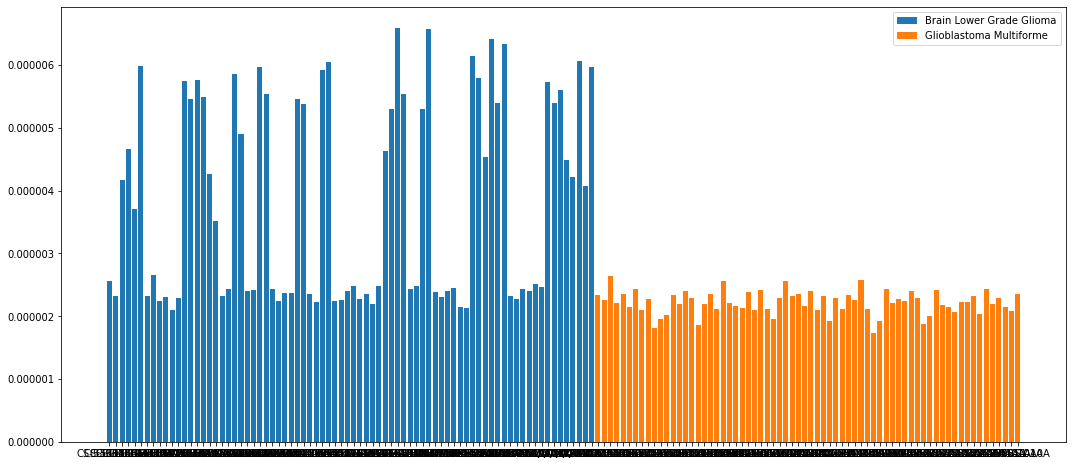

In [64]:
groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

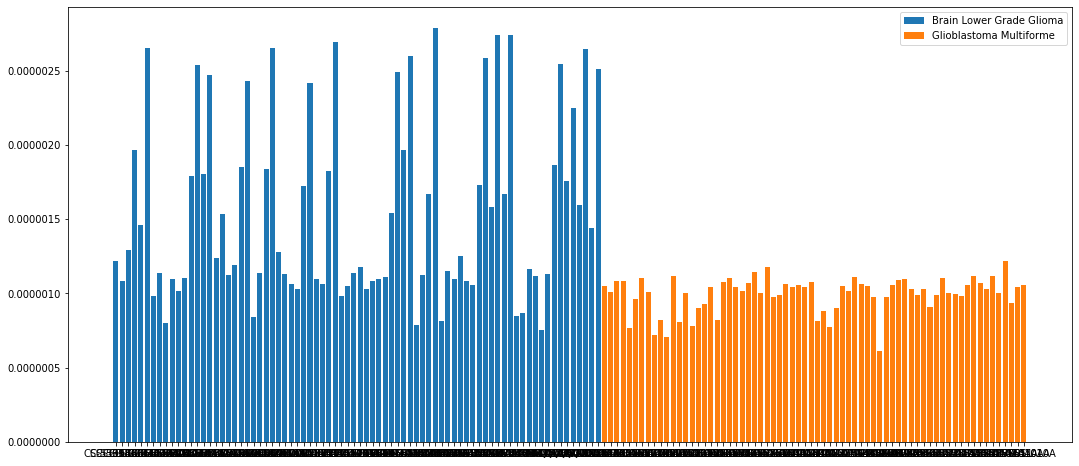

In [65]:
groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

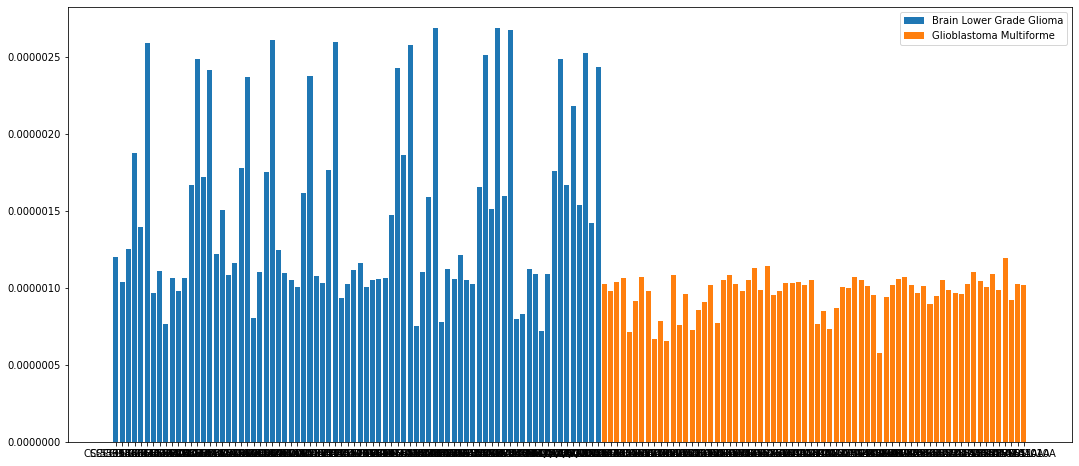

In [66]:
groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized r10 uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

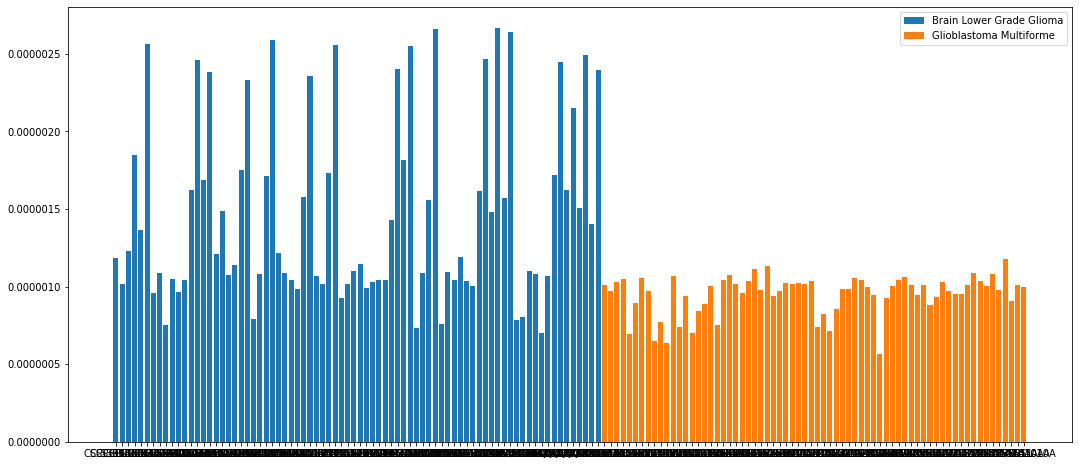

In [67]:
groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized r100 uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

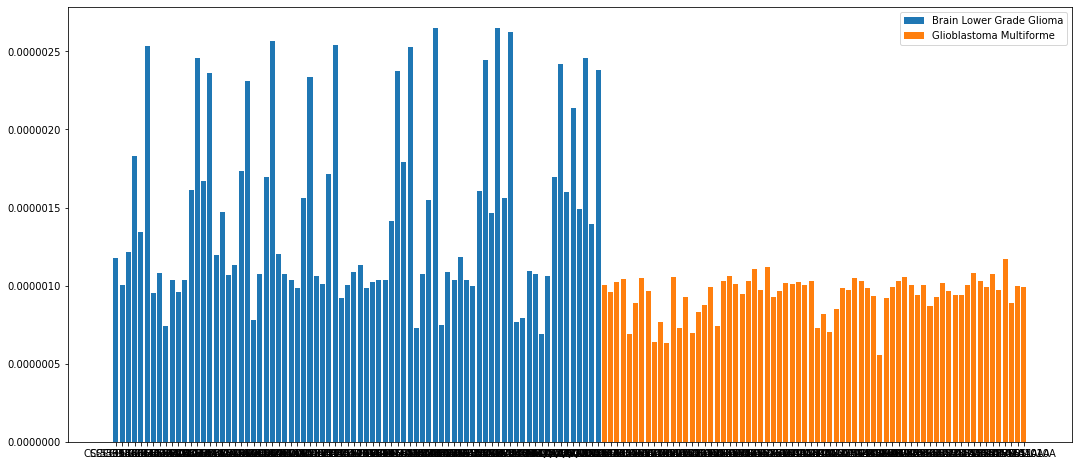

In [68]:
groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized r1000 uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

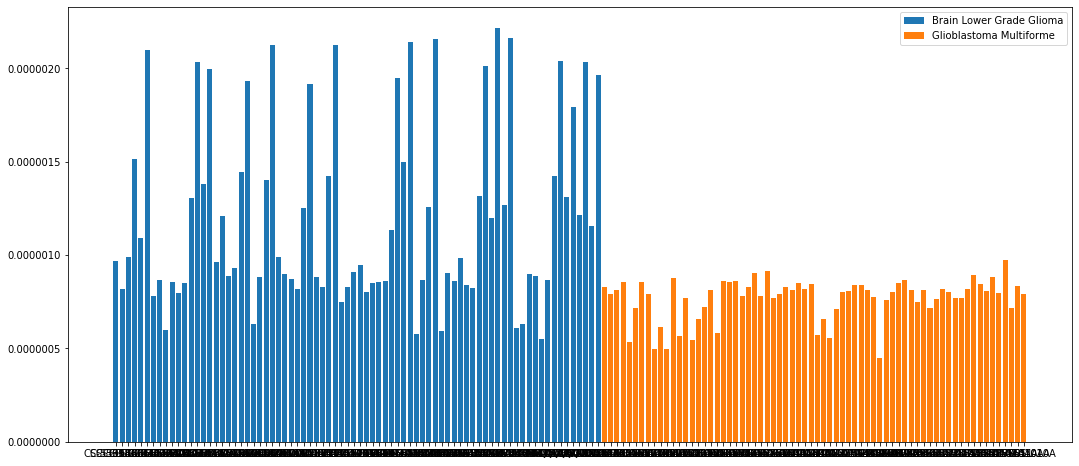

In [69]:
groups = df.groupby('disease_type')
fig, ax = plt.subplots()
for name, group in groups:
    ax.bar(group['sample'],group['normalized r10000 uniq HERVK113 paired human Q20 aligned'], label=name)
ax.legend()

```
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        groups = df.groupby('disease_type')
        fig, ax = plt.subplots()
        plt.xticks(rotation=90)
        for name, group in groups:
            ax.bar(group['sample'],group['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'], label=name)
        ax.legend()
        plt.show()
```

In [70]:
tumor=df[df['sample'].str.contains("-01.$")].copy()

In [71]:
tumor.shape

(73, 125)

In [72]:
tumor.head()

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,normalized r10 uniq SVA_E paired human Q20 aligned,normalized r100 uniq SVA_E paired human Q20 aligned,normalized r1000 uniq SVA_E paired human Q20 aligned,normalized r10000 uniq SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned,normalized uniq SVA_F paired human Q20 aligned,normalized r10 uniq SVA_F paired human Q20 aligned,normalized r100 uniq SVA_F paired human Q20 aligned,normalized r1000 uniq SVA_F paired human Q20 aligned,normalized r10000 uniq SVA_F paired human Q20 aligned
0,02-2483-01A,566024474,3558,1328,596,580,573,568,470,470,...,0.000004,0.000004,0.000004,0.000003,0.000004,0.000003,0.000002,0.000002,0.000002,0.000002
2,02-2485-01A,575060540,3782,1523,622,598,591,587,469,469,...,0.000004,0.000004,0.000004,0.000003,0.000004,0.000003,0.000002,0.000002,0.000002,0.000002
4,06-0125-01A,1066268796,5920,2514,816,761,742,734,568,568,...,0.000003,0.000003,0.000003,0.000002,0.000005,0.000003,0.000002,0.000002,0.000002,0.000002
6,06-0157-01A,551037711,3280,1338,609,591,582,577,471,471,...,0.000004,0.000004,0.000004,0.000004,0.000005,0.000003,0.000003,0.000003,0.000003,0.000002
8,06-0171-01A,1170585350,6420,2672,841,785,761,750,583,583,...,0.000003,0.000003,0.000003,0.000002,0.000005,0.000002,0.000002,0.000002,0.000002,0.000002


In [73]:
normal=df[df['sample'].str.contains("-10.$")].copy()

In [74]:
normal.shape

(73, 125)

In [75]:
# Already done above
#normal.drop(normal[normal['subject']=='CS-5390'].index,inplace=True)

In [76]:
normal.shape

(73, 125)

In [77]:
normal.head()

,sample,raw pair count,HERVK113 paired reads aligned,HERVK113 paired human Q20 aligned,uniq HERVK113 paired human Q20 aligned,r10 uniq HERVK113 paired human Q20 aligned,r100 uniq HERVK113 paired human Q20 aligned,r1000 uniq HERVK113 paired human Q20 aligned,r10000 uniq HERVK113 paired human Q20 aligned,r100000 uniq HERVK113 paired human Q20 aligned,...,normalized r10 uniq SVA_E paired human Q20 aligned,normalized r100 uniq SVA_E paired human Q20 aligned,normalized r1000 uniq SVA_E paired human Q20 aligned,normalized r10000 uniq SVA_E paired human Q20 aligned,normalized SVA_F paired human Q20 aligned,normalized uniq SVA_F paired human Q20 aligned,normalized r10 uniq SVA_F paired human Q20 aligned,normalized r100 uniq SVA_F paired human Q20 aligned,normalized r1000 uniq SVA_F paired human Q20 aligned,normalized r10000 uniq SVA_F paired human Q20 aligned
1,02-2483-10A,579304076,3338,1308,586,569,562,557,460,460,...,0.000004,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002
3,02-2485-10A,478851061,2564,1061,520,508,503,498,410,410,...,0.000004,0.000004,0.000004,0.000004,0.000004,0.000003,0.000003,0.000002,0.000002,0.000002
5,06-0125-10A,695377506,3778,1494,667,636,624,620,498,498,...,0.000004,0.000003,0.000003,0.000003,0.000004,0.000003,0.000002,0.000002,0.000002,0.000002
7,06-0157-10A,561676819,3040,1179,567,551,547,542,446,446,...,0.000004,0.000004,0.000004,0.000003,0.000004,0.000002,0.000002,0.000002,0.000002,0.000002
9,06-0171-10A,721570484,3472,1306,592,567,555,552,445,445,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000002,0.000002,0.000002,0.000002,0.000002


In [78]:
tn=normal.merge(tumor,on='subject',suffixes=["_normal","_tumor"],how='outer')

In [79]:
tn.shape

(73, 249)

In [80]:
tn.head()

,sample_normal,raw pair count_normal,HERVK113 paired reads aligned_normal,HERVK113 paired human Q20 aligned_normal,uniq HERVK113 paired human Q20 aligned_normal,r10 uniq HERVK113 paired human Q20 aligned_normal,r100 uniq HERVK113 paired human Q20 aligned_normal,r1000 uniq HERVK113 paired human Q20 aligned_normal,r10000 uniq HERVK113 paired human Q20 aligned_normal,r100000 uniq HERVK113 paired human Q20 aligned_normal,...,normalized r10 uniq SVA_E paired human Q20 aligned_tumor,normalized r100 uniq SVA_E paired human Q20 aligned_tumor,normalized r1000 uniq SVA_E paired human Q20 aligned_tumor,normalized r10000 uniq SVA_E paired human Q20 aligned_tumor,normalized SVA_F paired human Q20 aligned_tumor,normalized uniq SVA_F paired human Q20 aligned_tumor,normalized r10 uniq SVA_F paired human Q20 aligned_tumor,normalized r100 uniq SVA_F paired human Q20 aligned_tumor,normalized r1000 uniq SVA_F paired human Q20 aligned_tumor,normalized r10000 uniq SVA_F paired human Q20 aligned_tumor
0,02-2483-10A,579304076,3338,1308,586,569,562,557,460,460,...,0.000004,0.000004,0.000004,0.000003,0.000004,0.000003,0.000002,0.000002,0.000002,0.000002
1,02-2485-10A,478851061,2564,1061,520,508,503,498,410,410,...,0.000004,0.000004,0.000004,0.000003,0.000004,0.000003,0.000002,0.000002,0.000002,0.000002
2,06-0125-10A,695377506,3778,1494,667,636,624,620,498,498,...,0.000003,0.000003,0.000003,0.000002,0.000005,0.000003,0.000002,0.000002,0.000002,0.000002
3,06-0157-10A,561676819,3040,1179,567,551,547,542,446,446,...,0.000004,0.000004,0.000004,0.000004,0.000005,0.000003,0.000003,0.000003,0.000003,0.000002
4,06-0171-10A,721570484,3472,1306,592,567,555,552,445,445,...,0.000003,0.000003,0.000003,0.000002,0.000005,0.000002,0.000002,0.000002,0.000002,0.000002


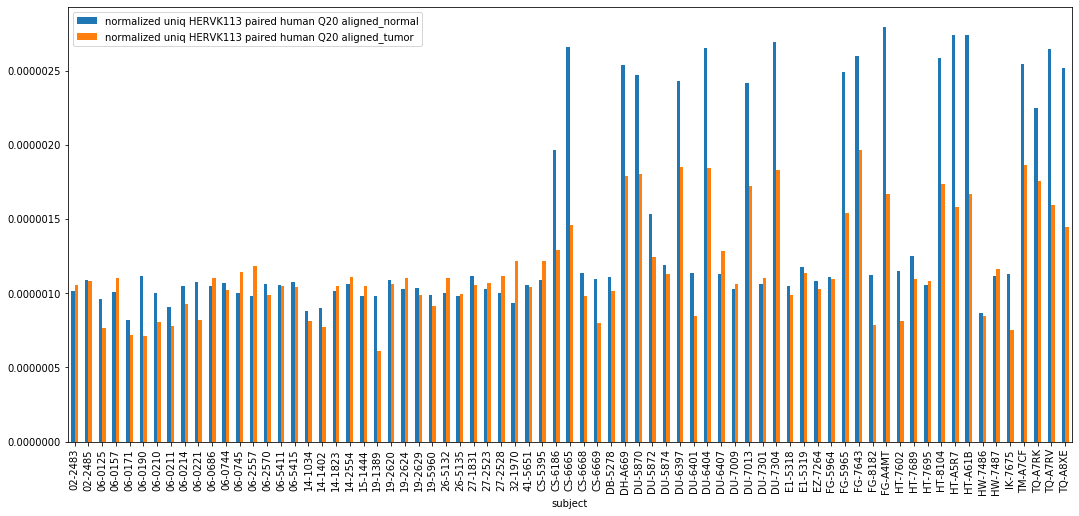

In [81]:
tn.plot(x='subject',y=['normalized uniq HERVK113 paired human Q20 aligned_normal',
                          'normalized uniq HERVK113 paired human Q20 aligned_tumor'],
            kind='bar')

```
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        tn.plot(x='subject',y=['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_normal',
                          'normalized '+s+'uniq '+hkle+' paired human Q20 aligned_tumor'],
                title=hkle+" : "+s,
            kind='bar')
        plt.show()
```     

In [82]:
df.loc[df['sample'].str.contains("-01.$"), 'tn'] = 'tumor'  
df.loc[df['sample'].str.contains("-10.$"), 'tn'] = 'normal'  

In [83]:
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)                 

In [84]:
df[['tn','sample']].head() 

,tn,sample
0,tumor,02-2483-01A
1,normal,02-2483-10A
2,tumor,02-2485-01A
3,normal,02-2485-10A
4,tumor,06-0125-01A


HERVK113:


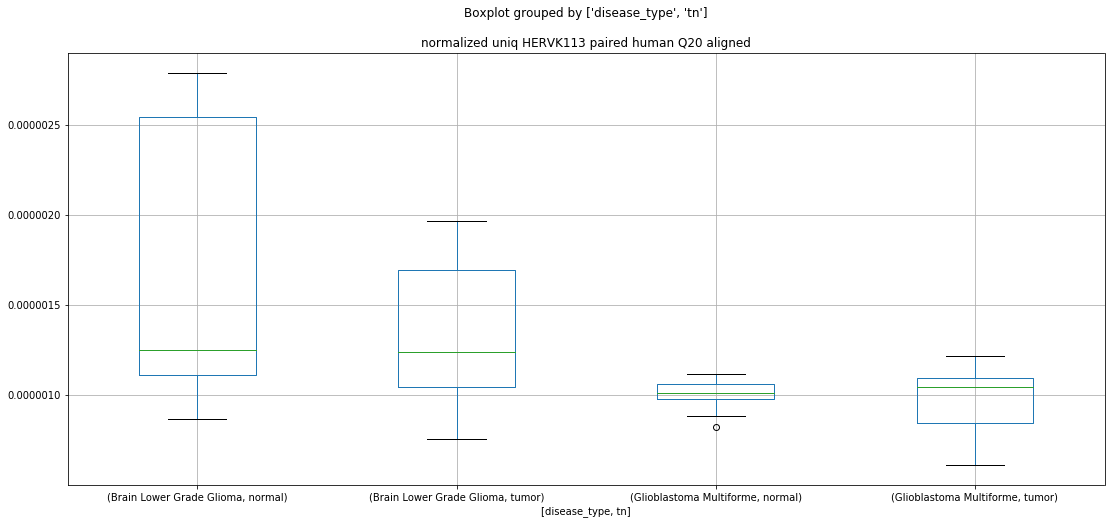

HERVK113:r10 


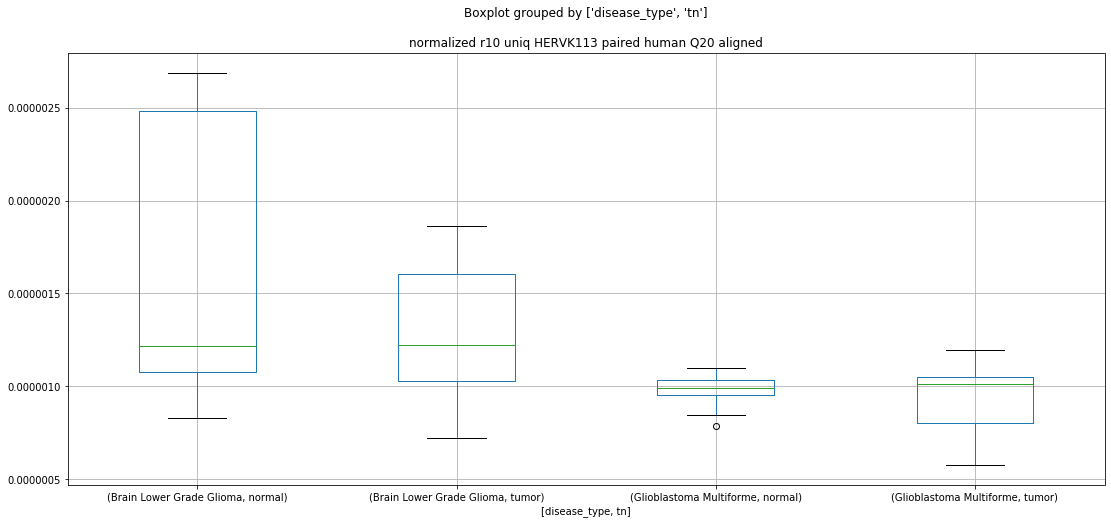

HERVK113:r100 


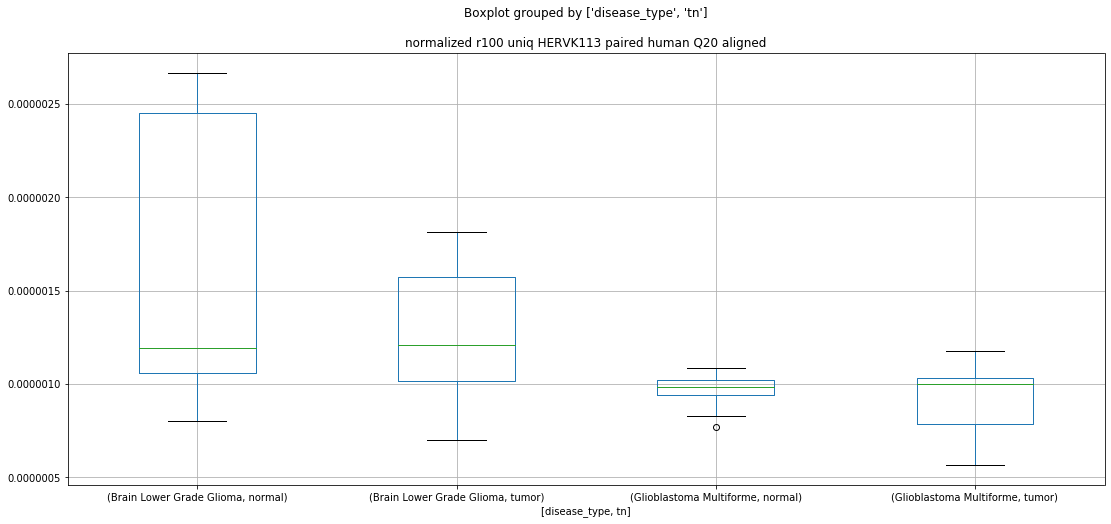

HERVK113:r1000 


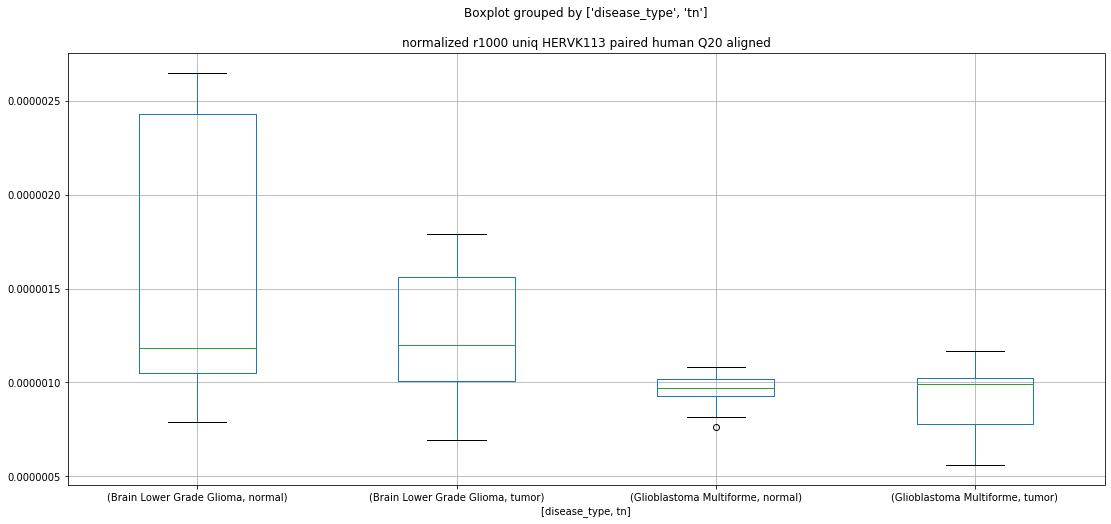

HERVK113:r10000 


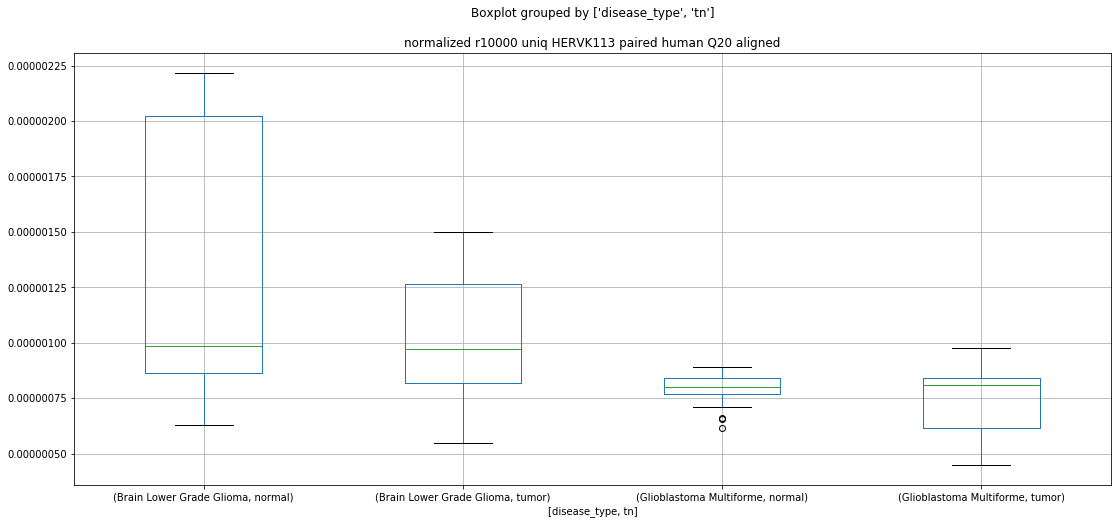

SVA_A:


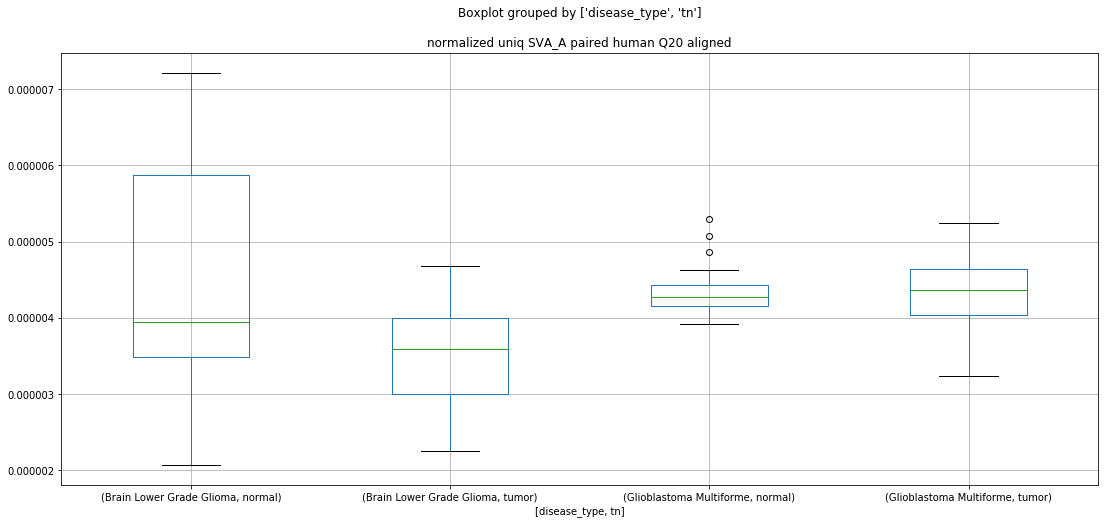

SVA_A:r10 


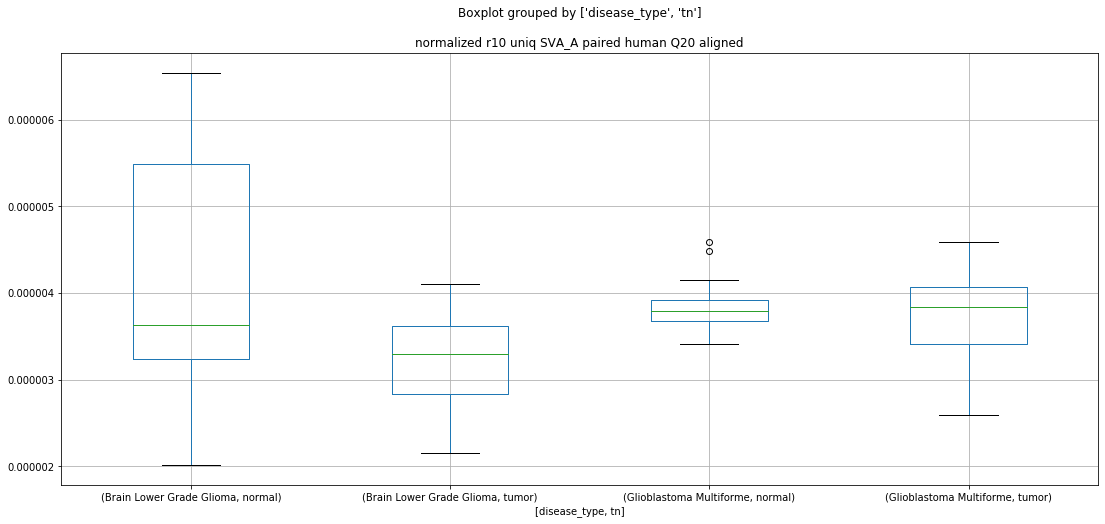

SVA_A:r100 


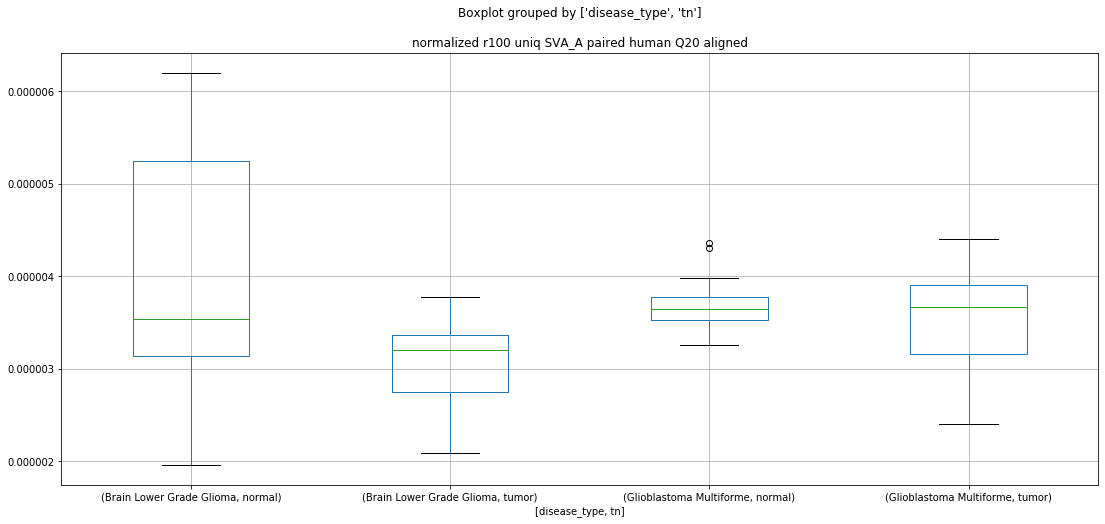

SVA_A:r1000 


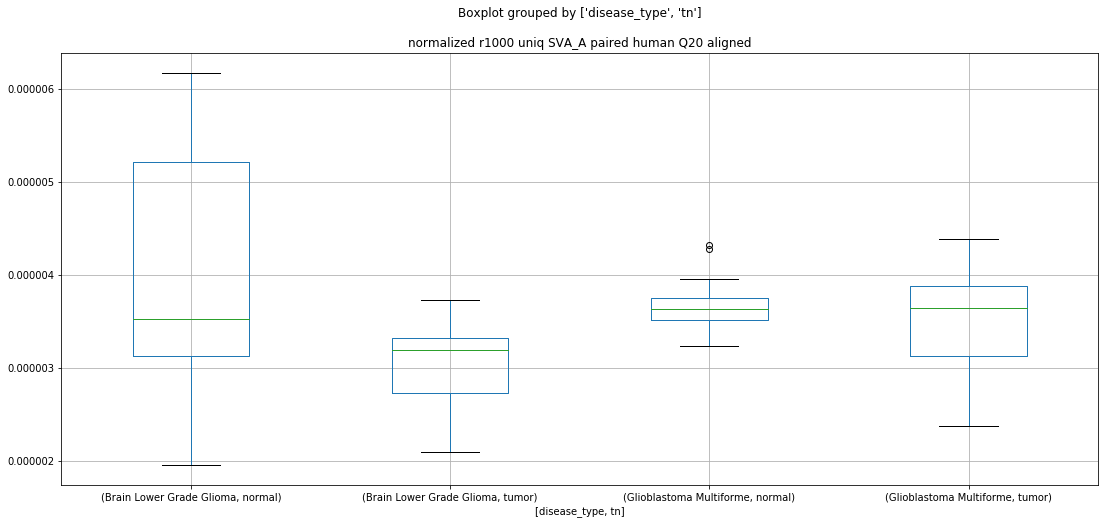

SVA_A:r10000 


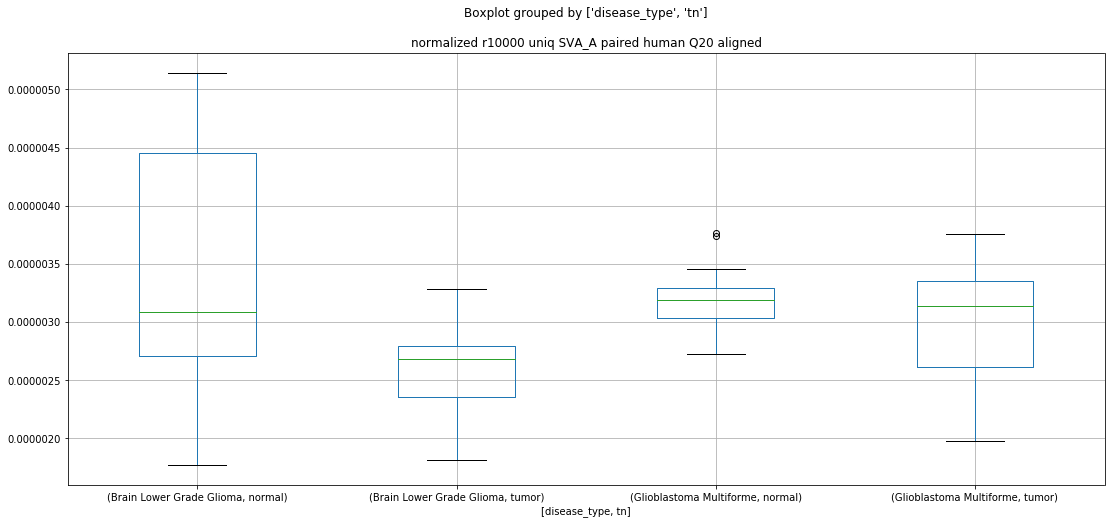

SVA_B:


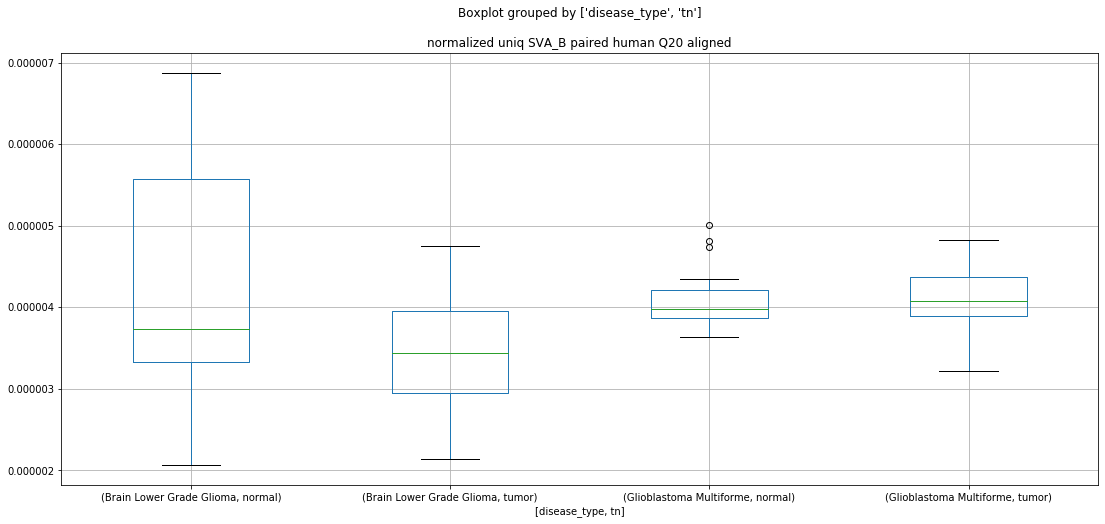

SVA_B:r10 


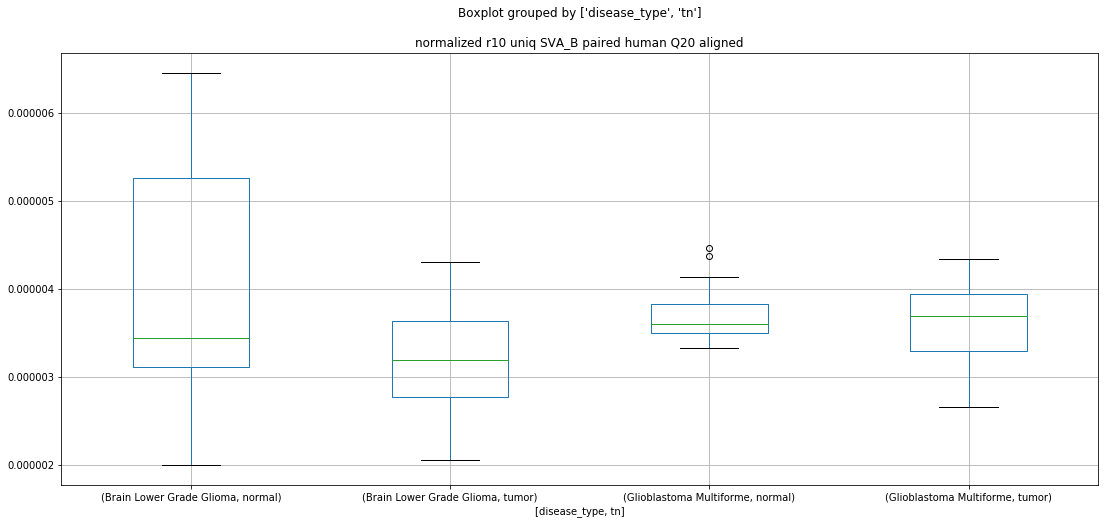

SVA_B:r100 


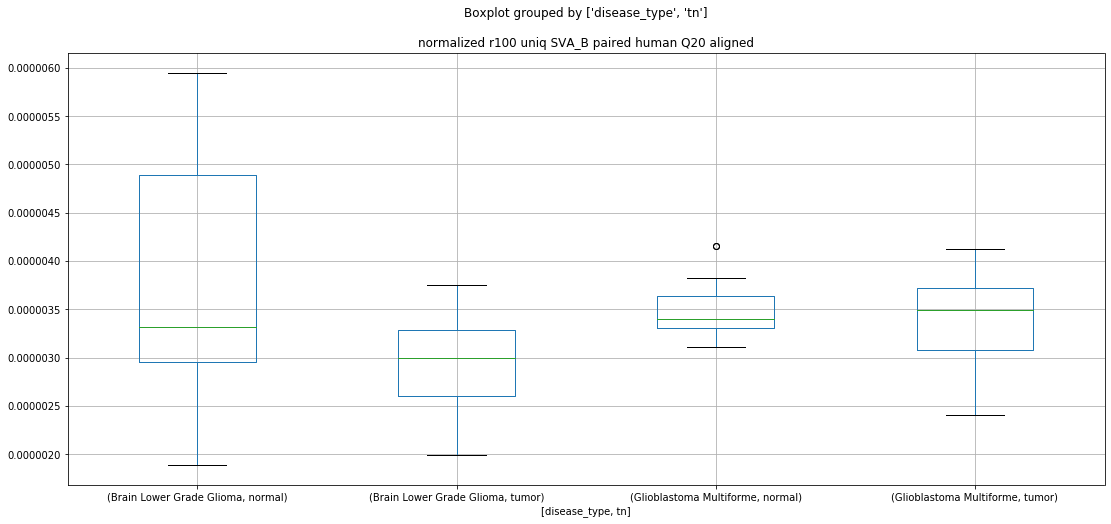

SVA_B:r1000 


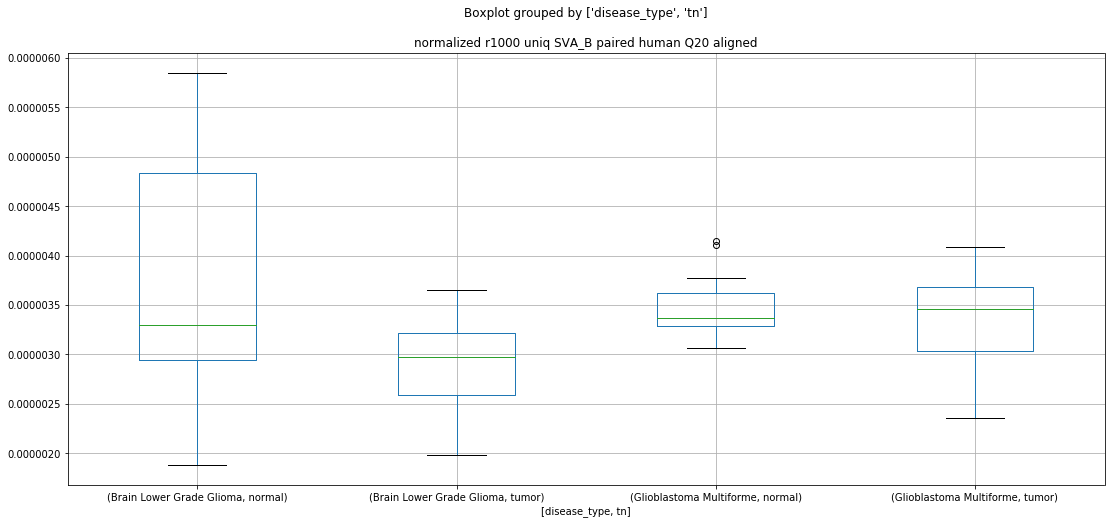

SVA_B:r10000 


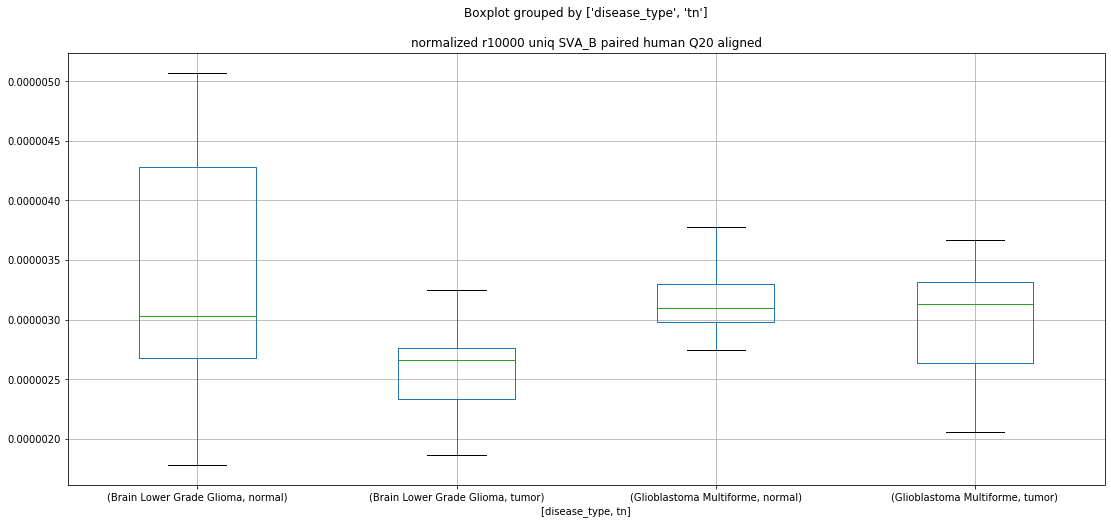

SVA_C:


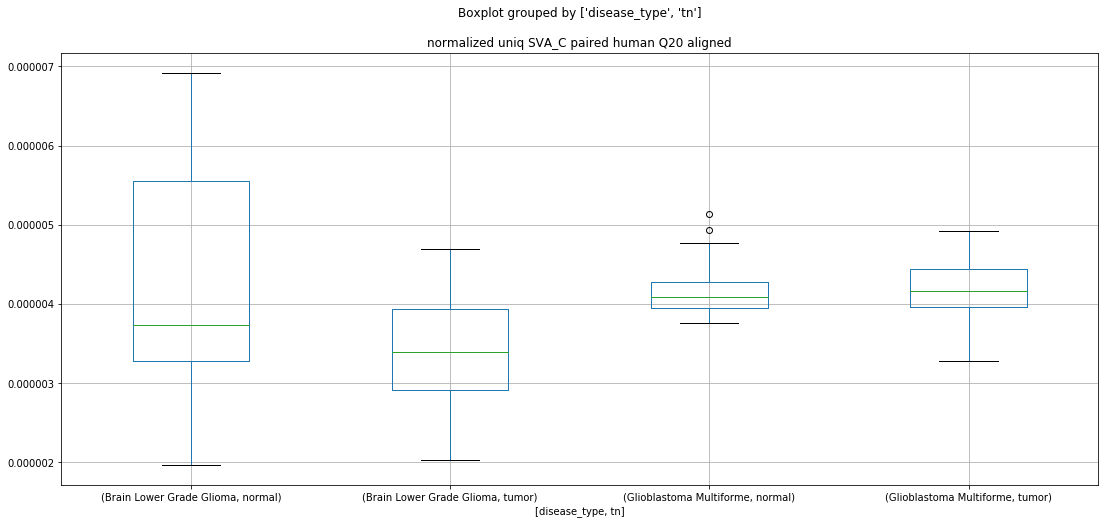

SVA_C:r10 


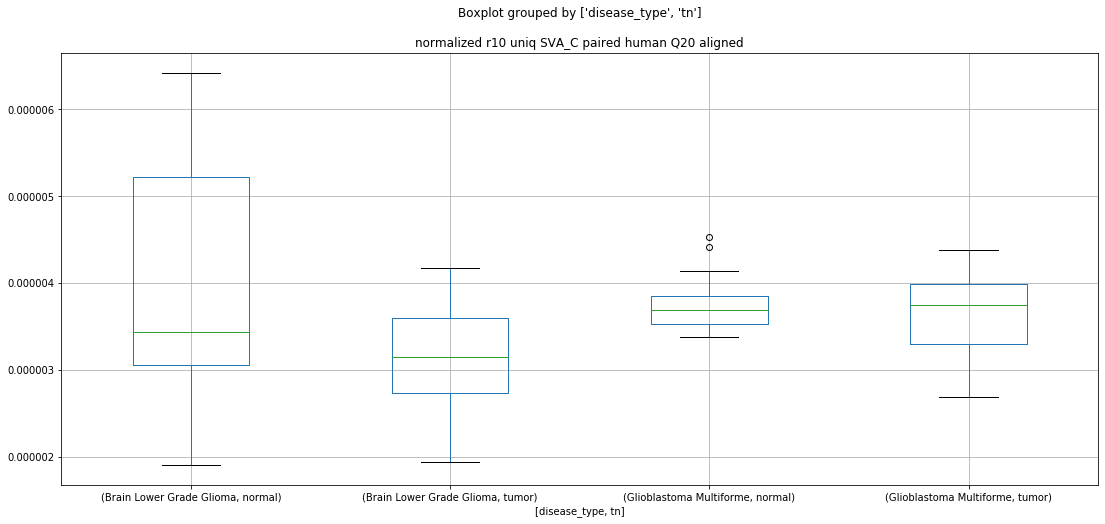

SVA_C:r100 


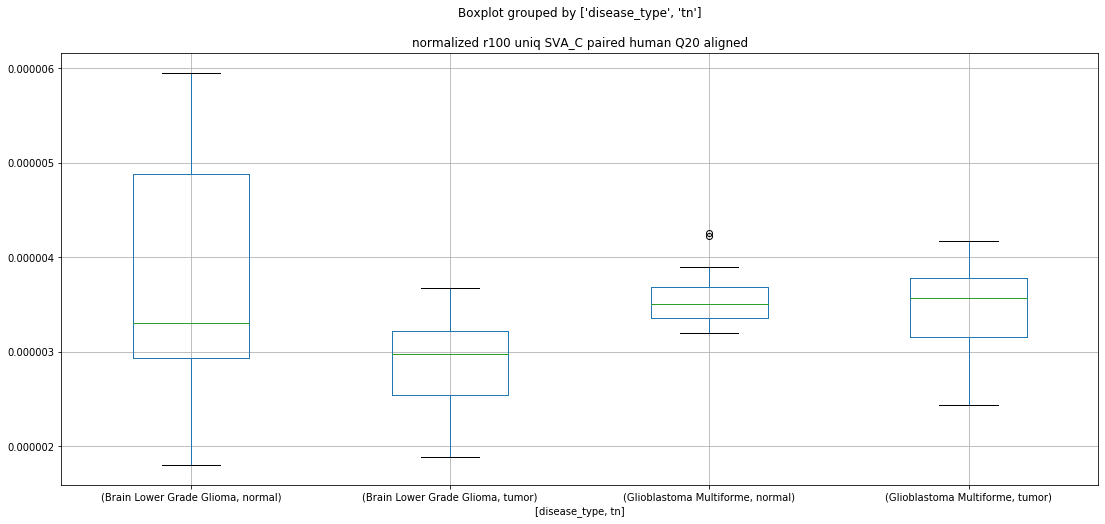

SVA_C:r1000 


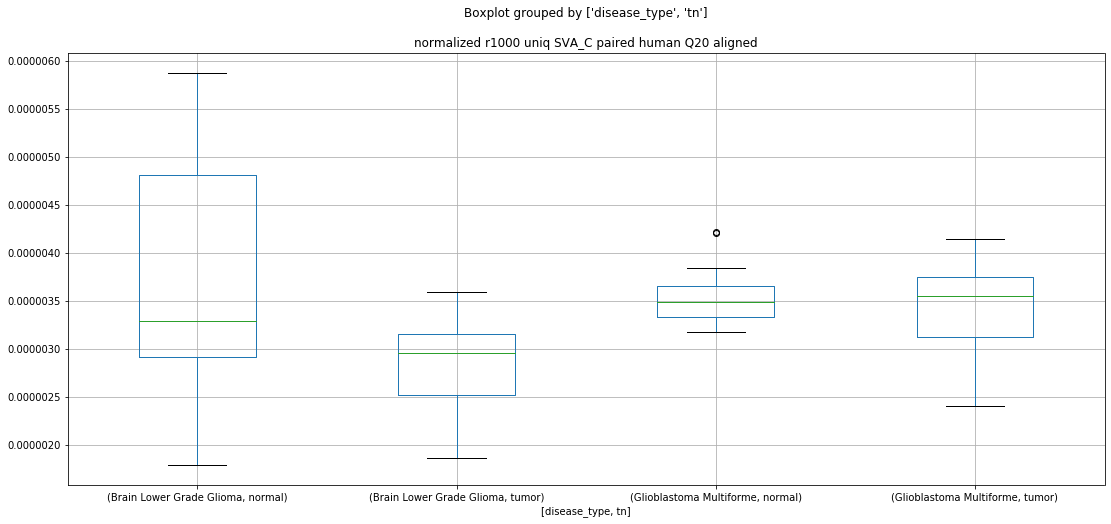

SVA_C:r10000 


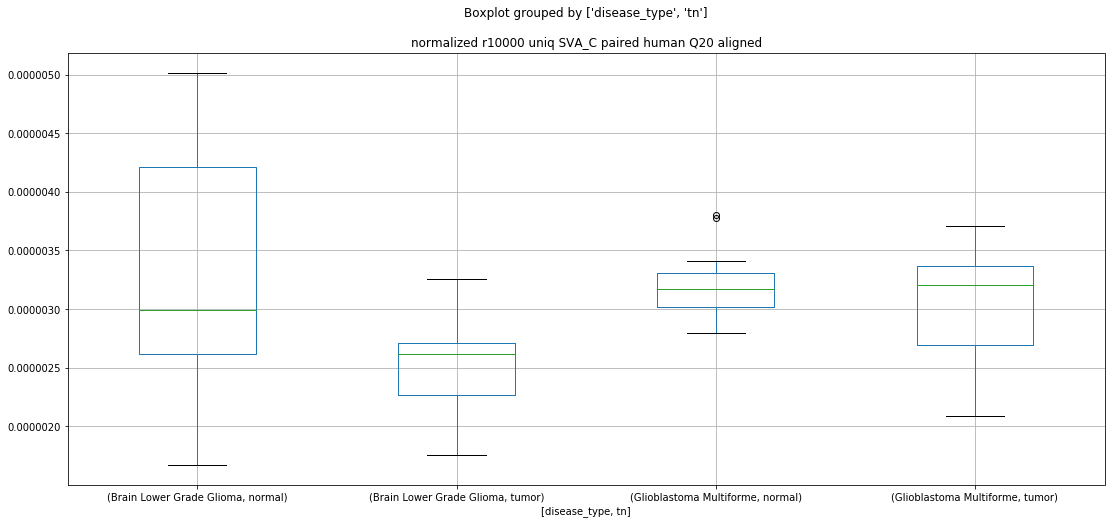

SVA_D:


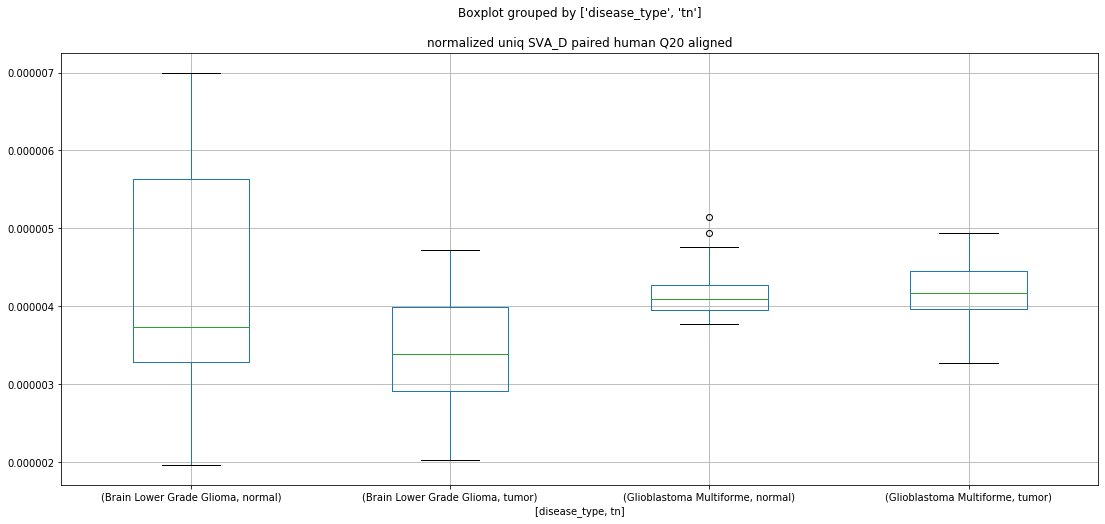

SVA_D:r10 


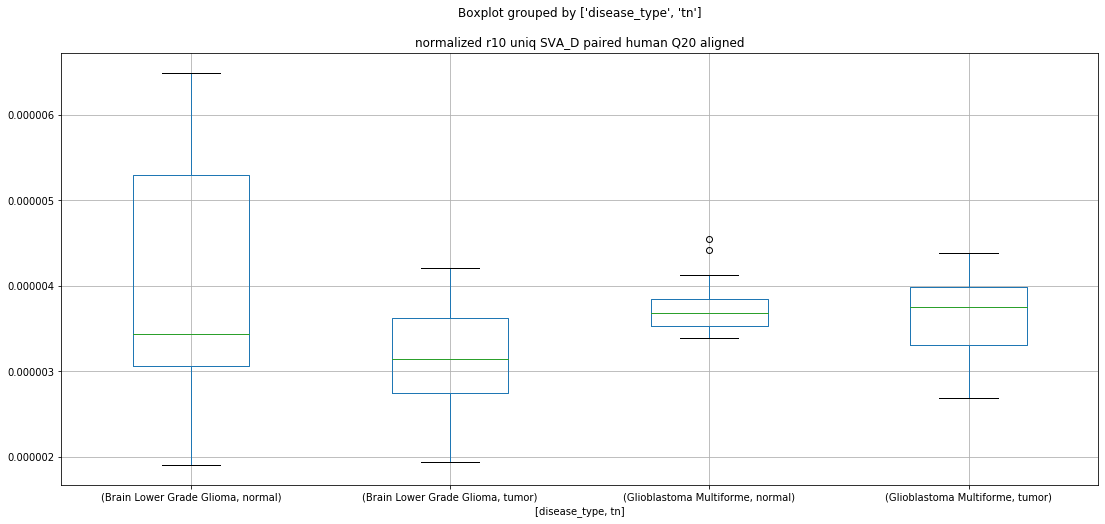

SVA_D:r100 


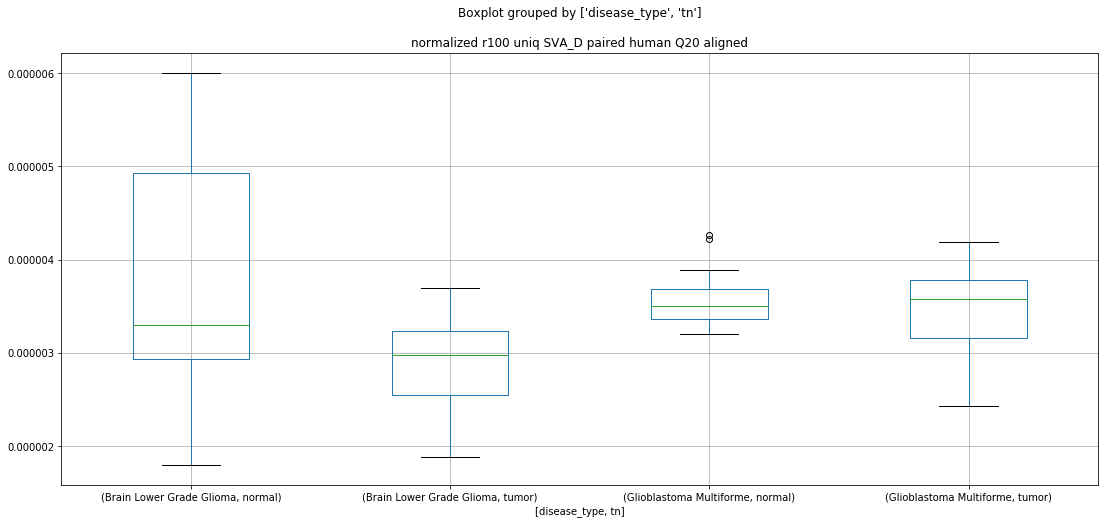

SVA_D:r1000 


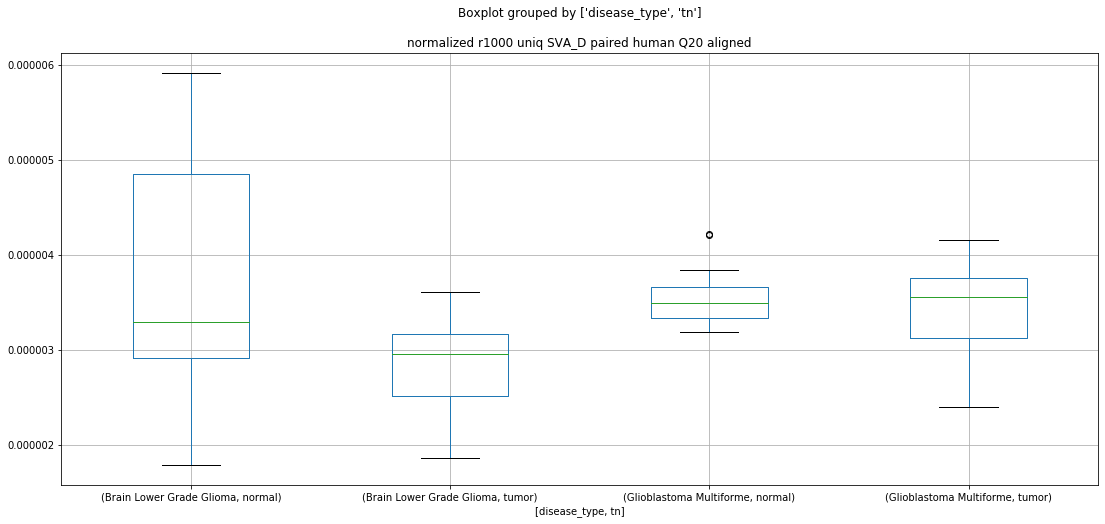

SVA_D:r10000 


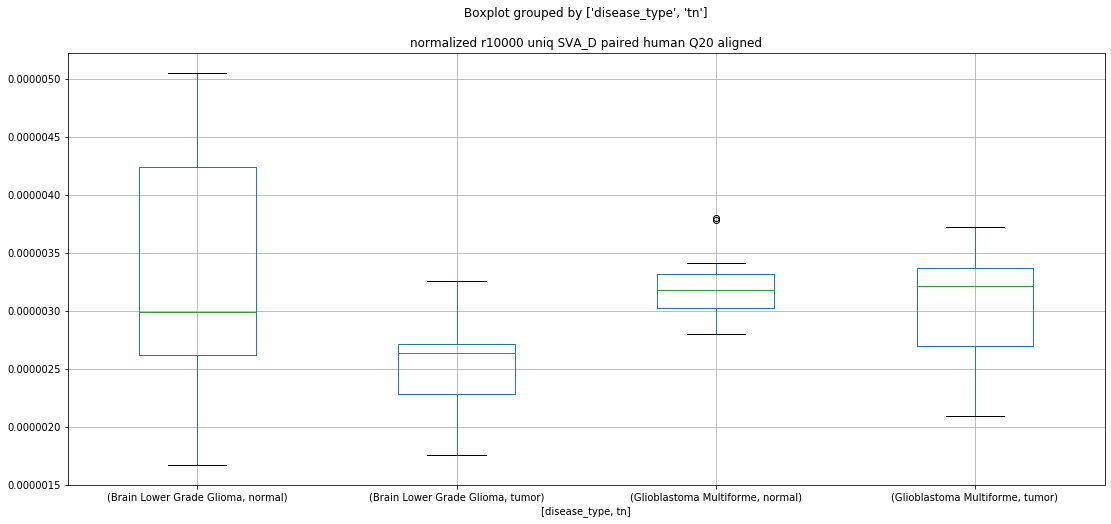

SVA_E:


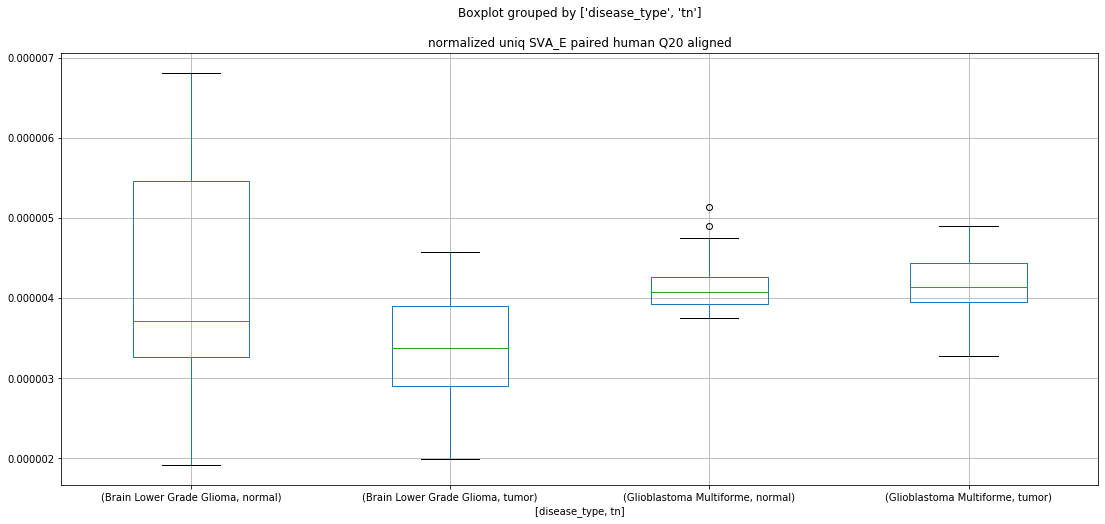

SVA_E:r10 


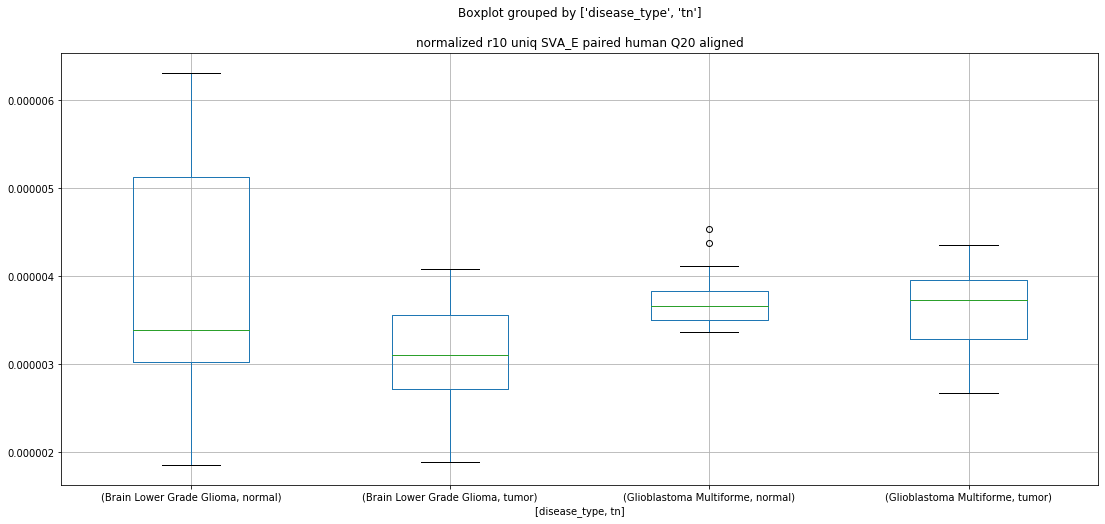

SVA_E:r100 


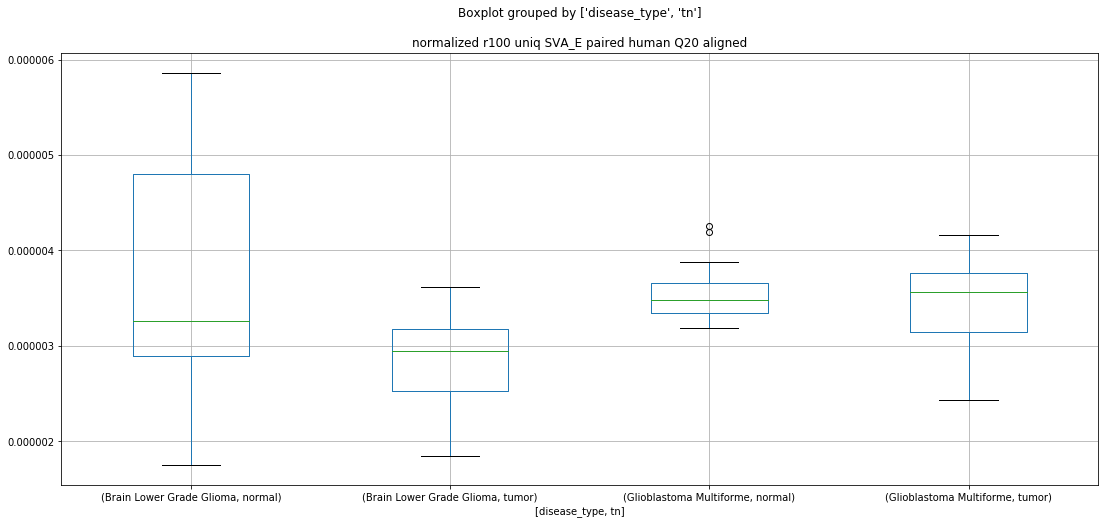

SVA_E:r1000 


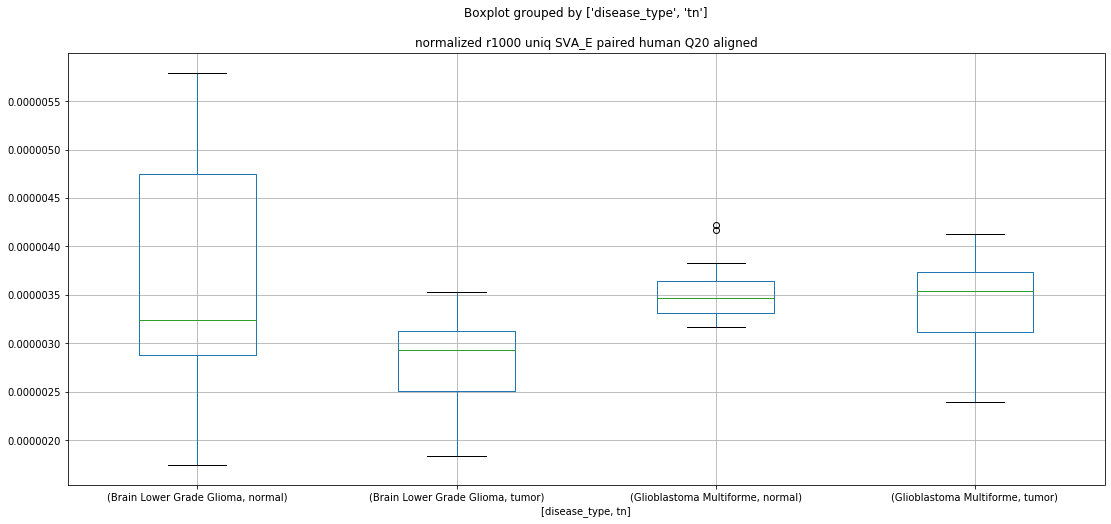

SVA_E:r10000 


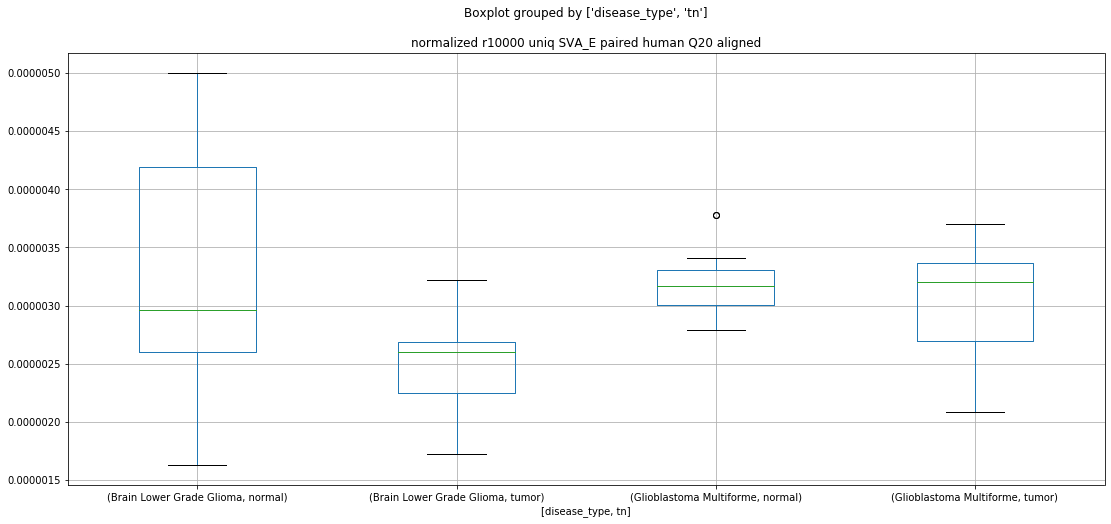

SVA_F:


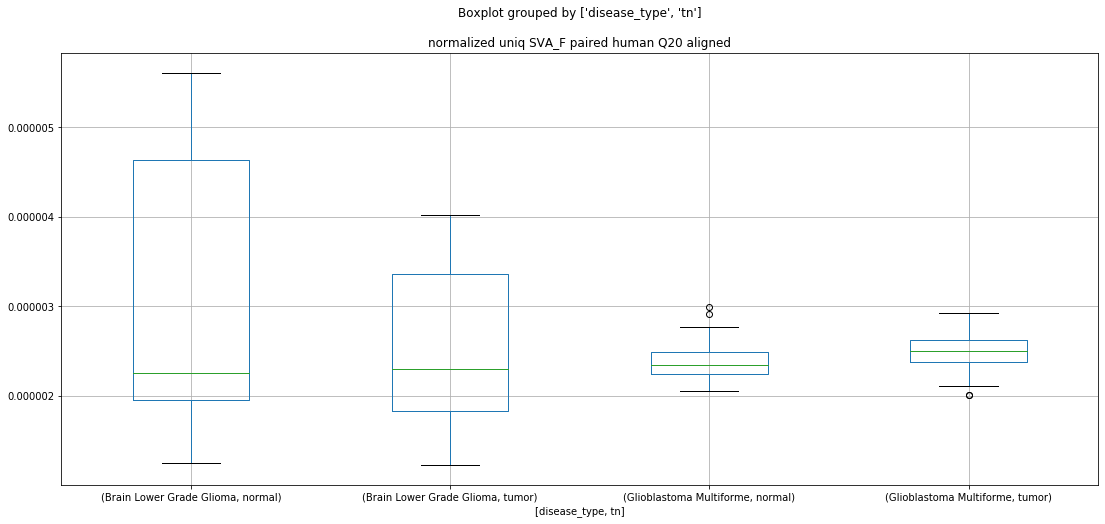

SVA_F:r10 


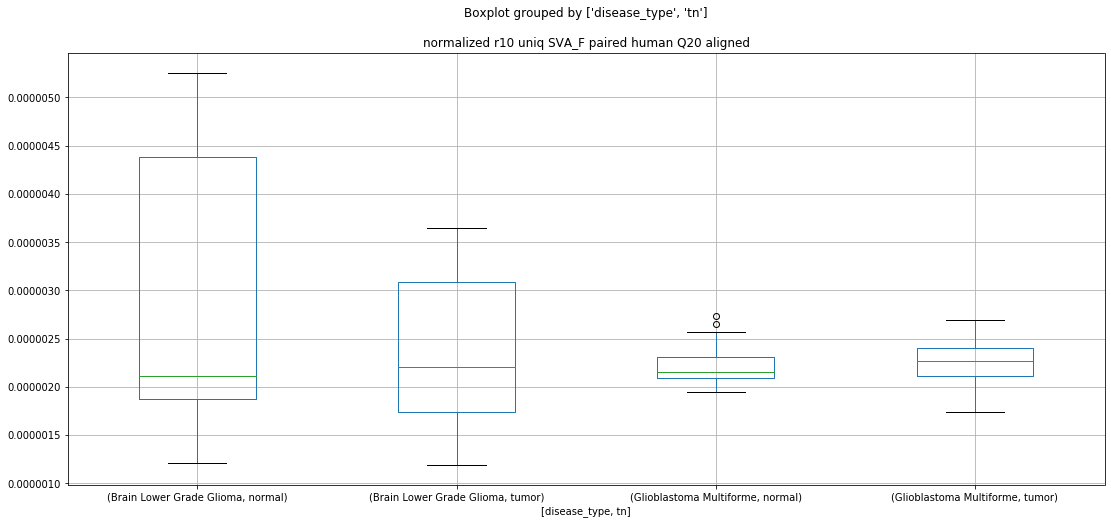

SVA_F:r100 


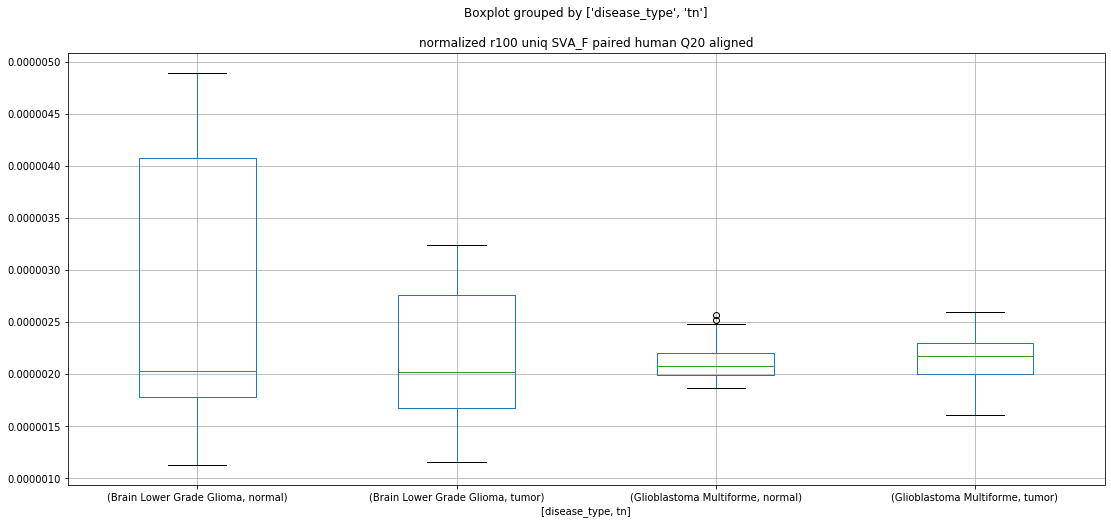

SVA_F:r1000 


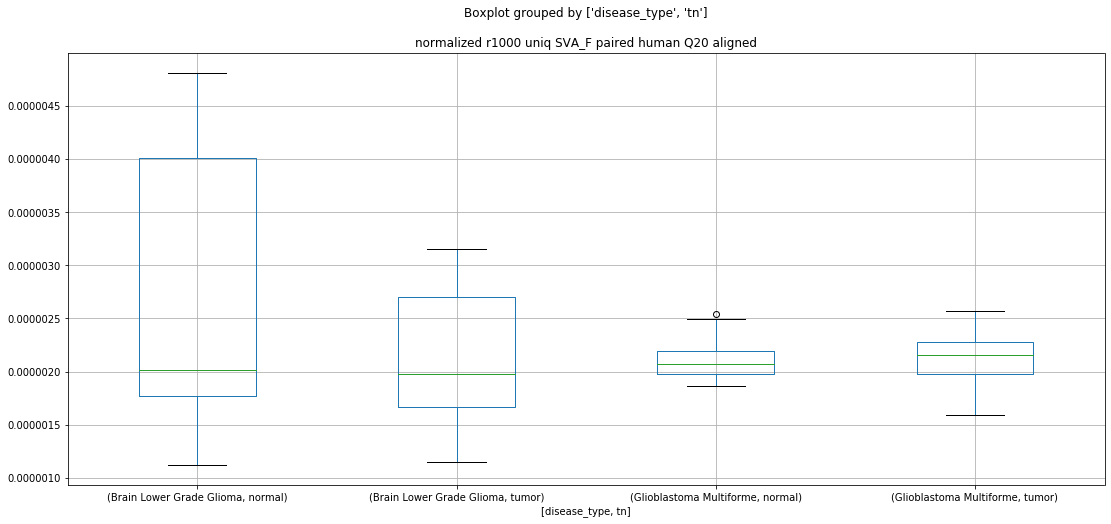

SVA_F:r10000 


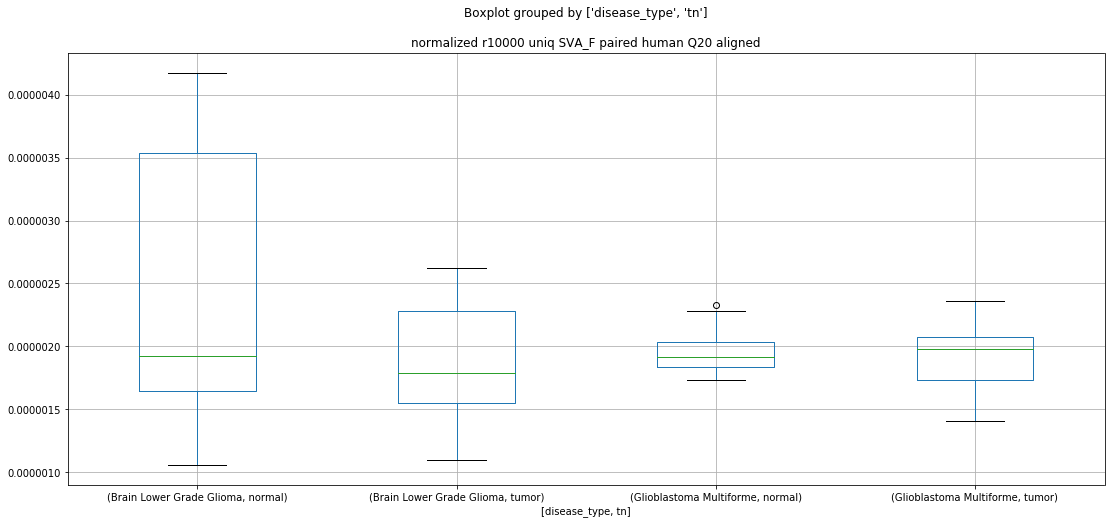

In [85]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        df.boxplot(column=['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
                by=['disease_type','tn'])
        plt.show()

HERVK113:


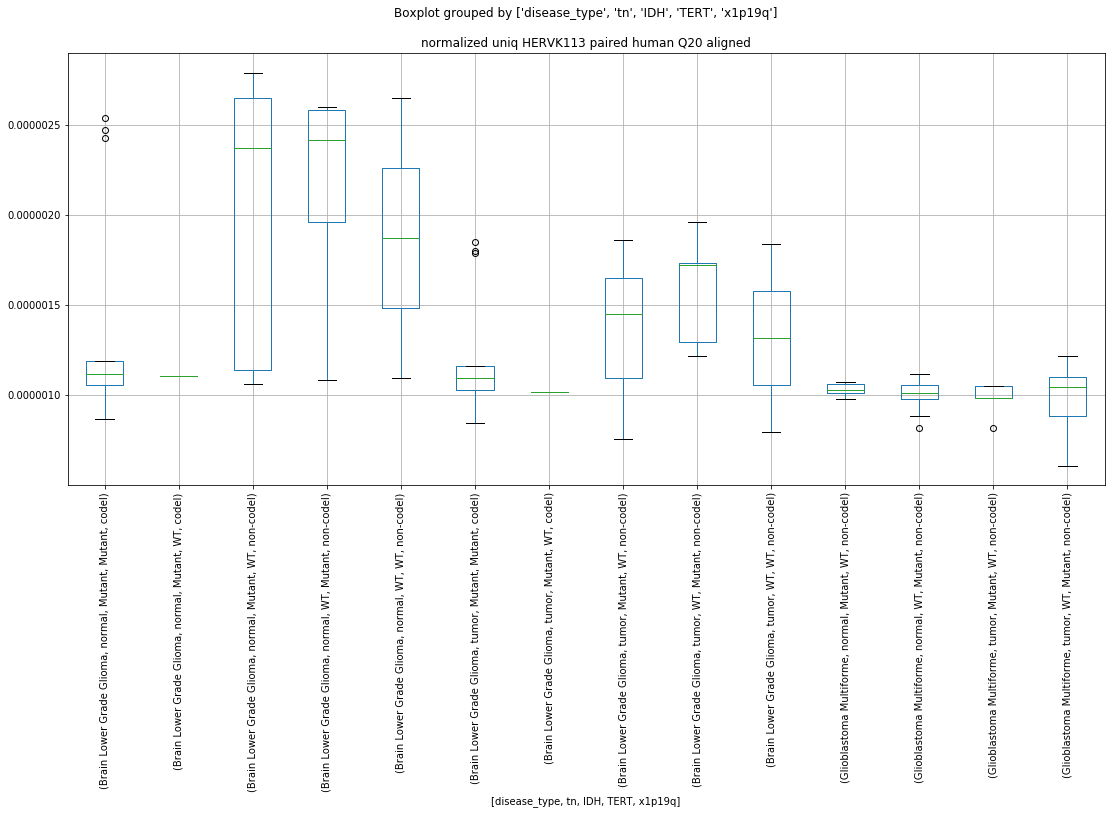

HERVK113:r10 


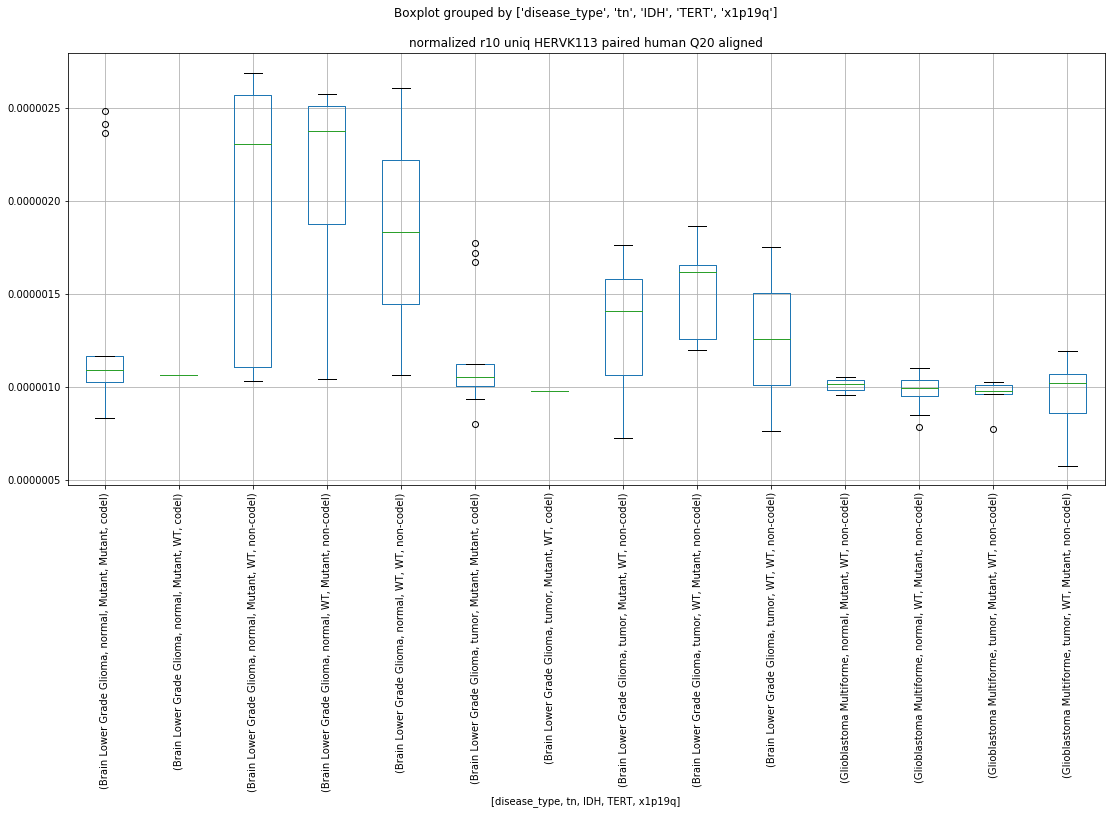

HERVK113:r100 


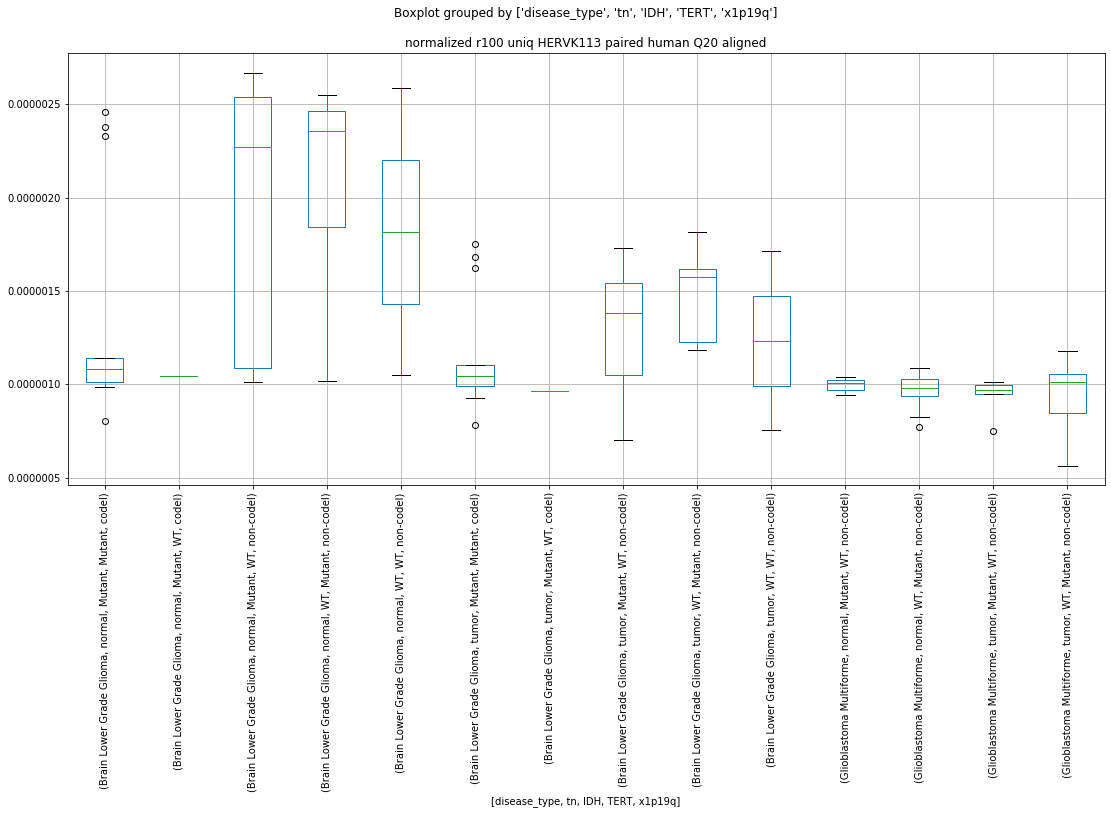

HERVK113:r1000 


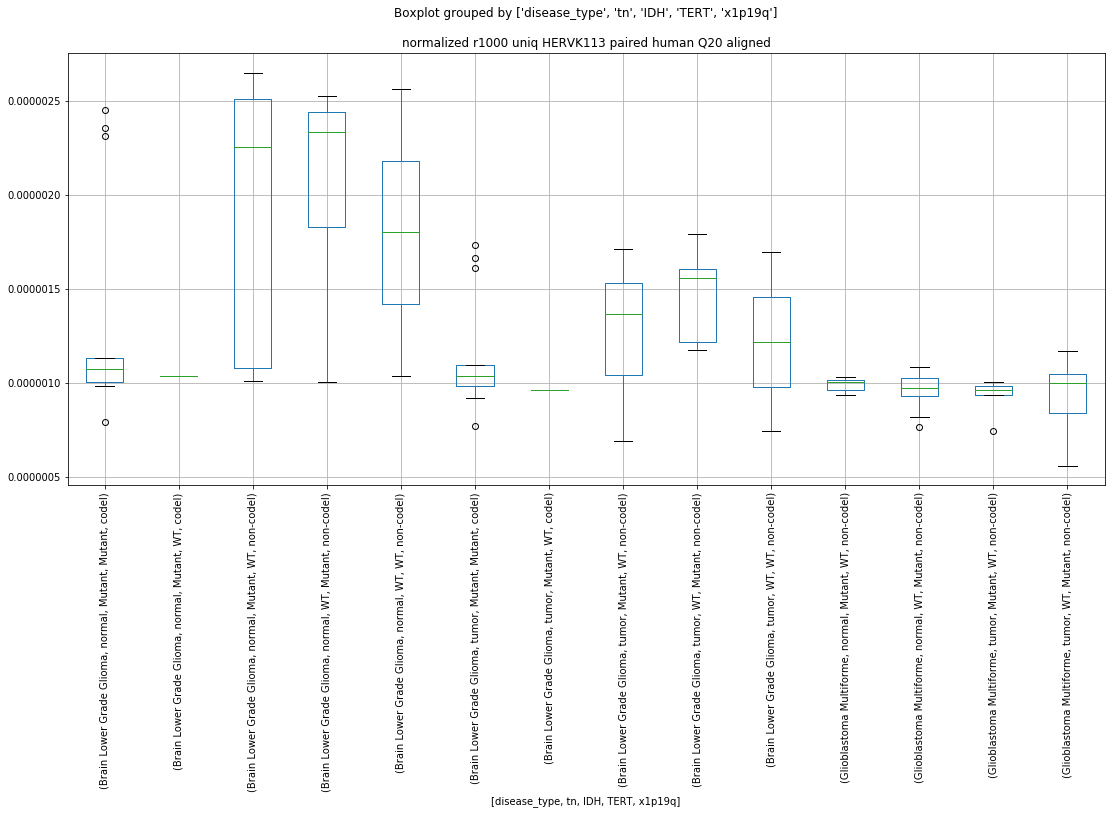

HERVK113:r10000 


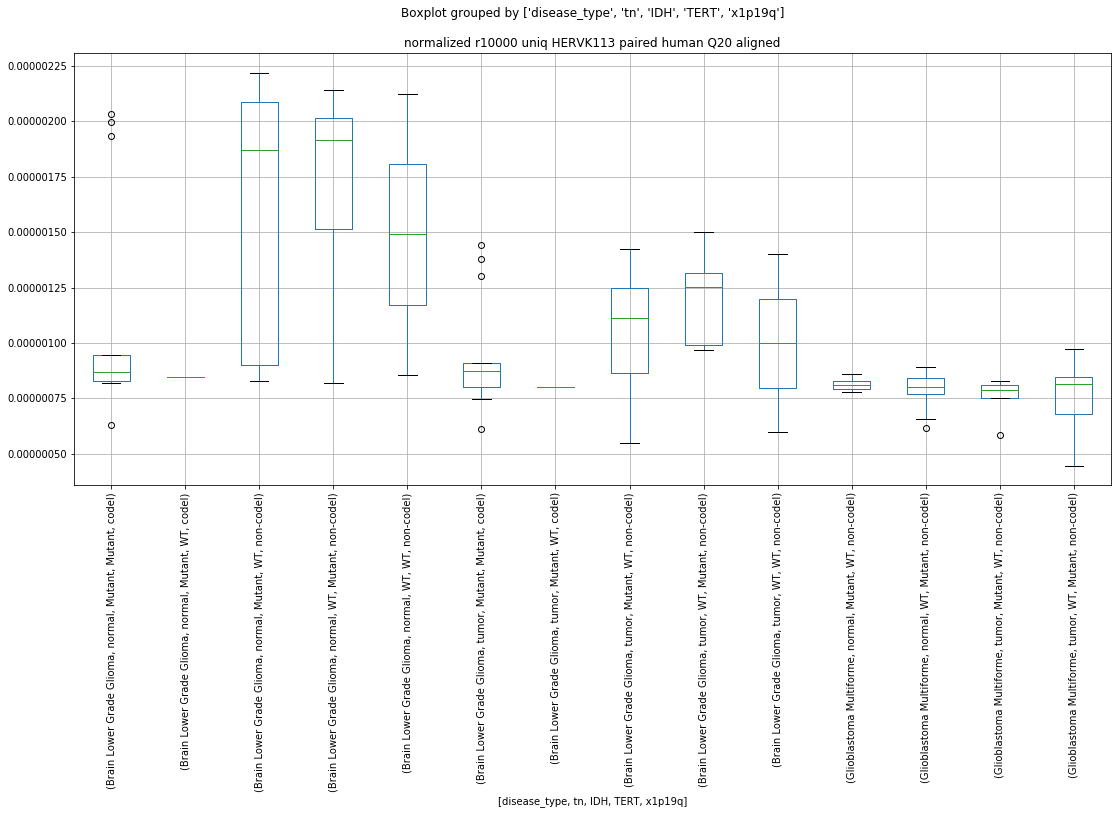

SVA_A:


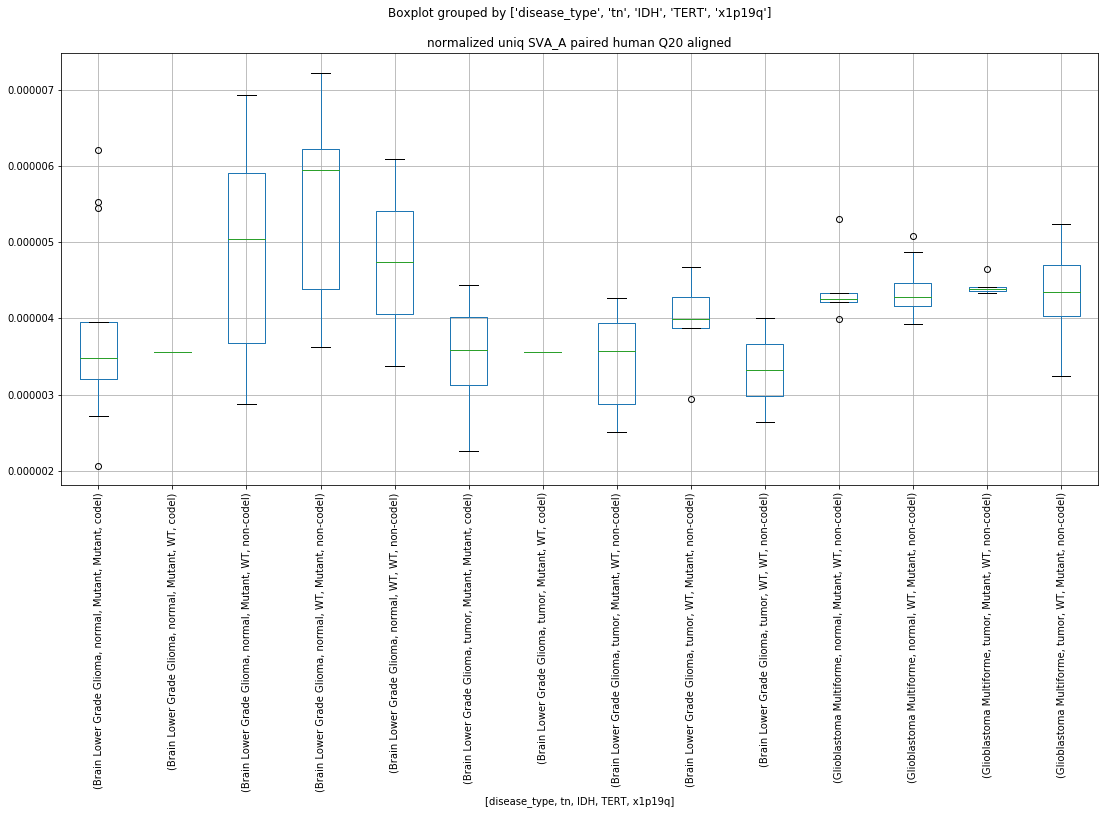

SVA_A:r10 


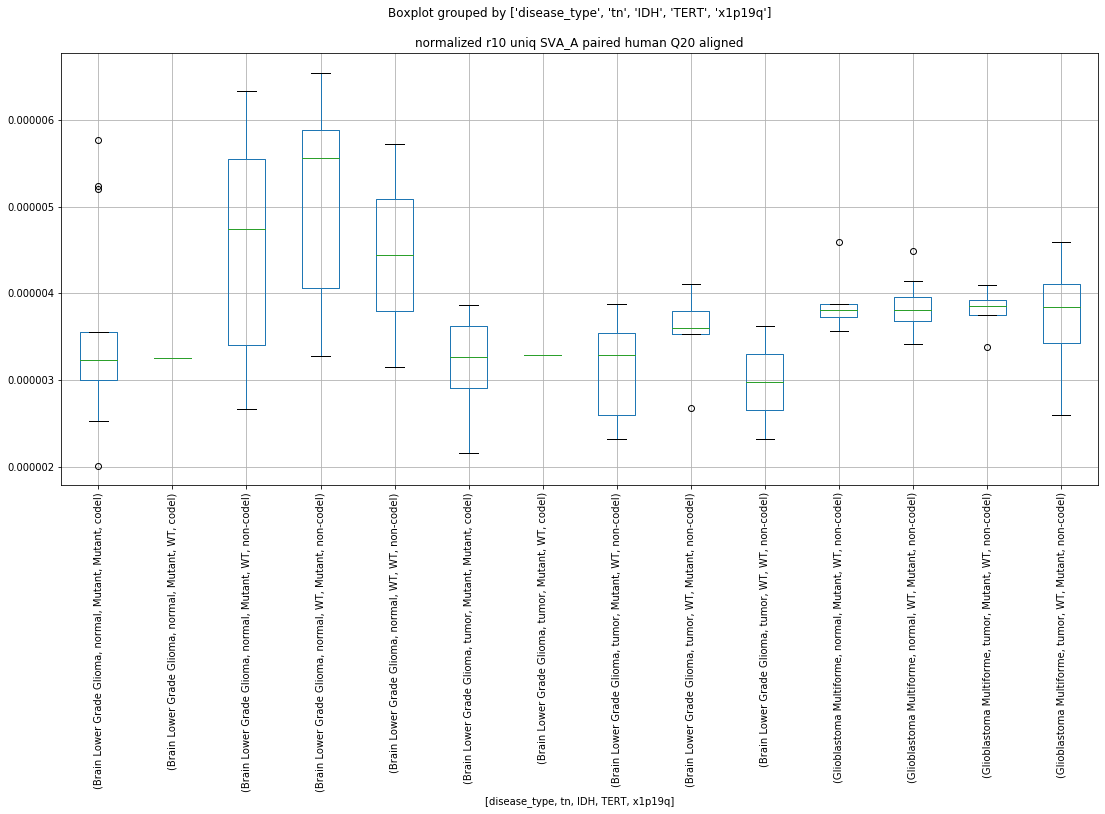

SVA_A:r100 


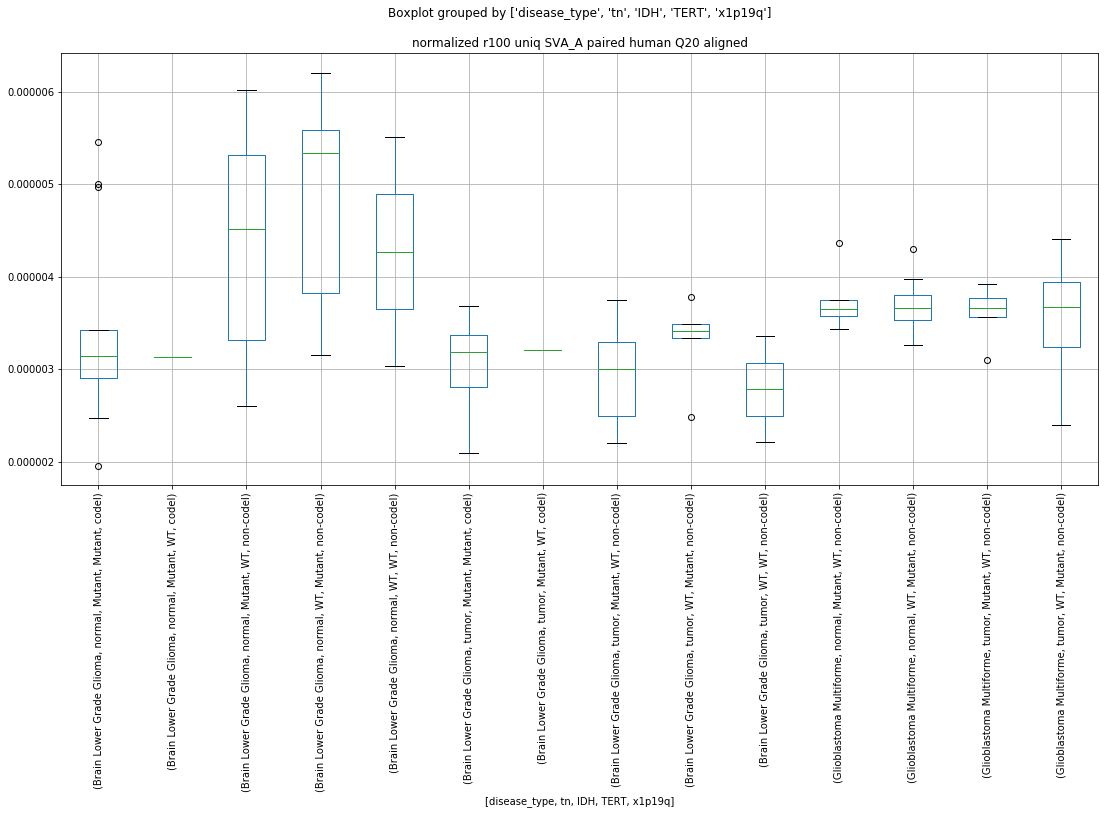

SVA_A:r1000 


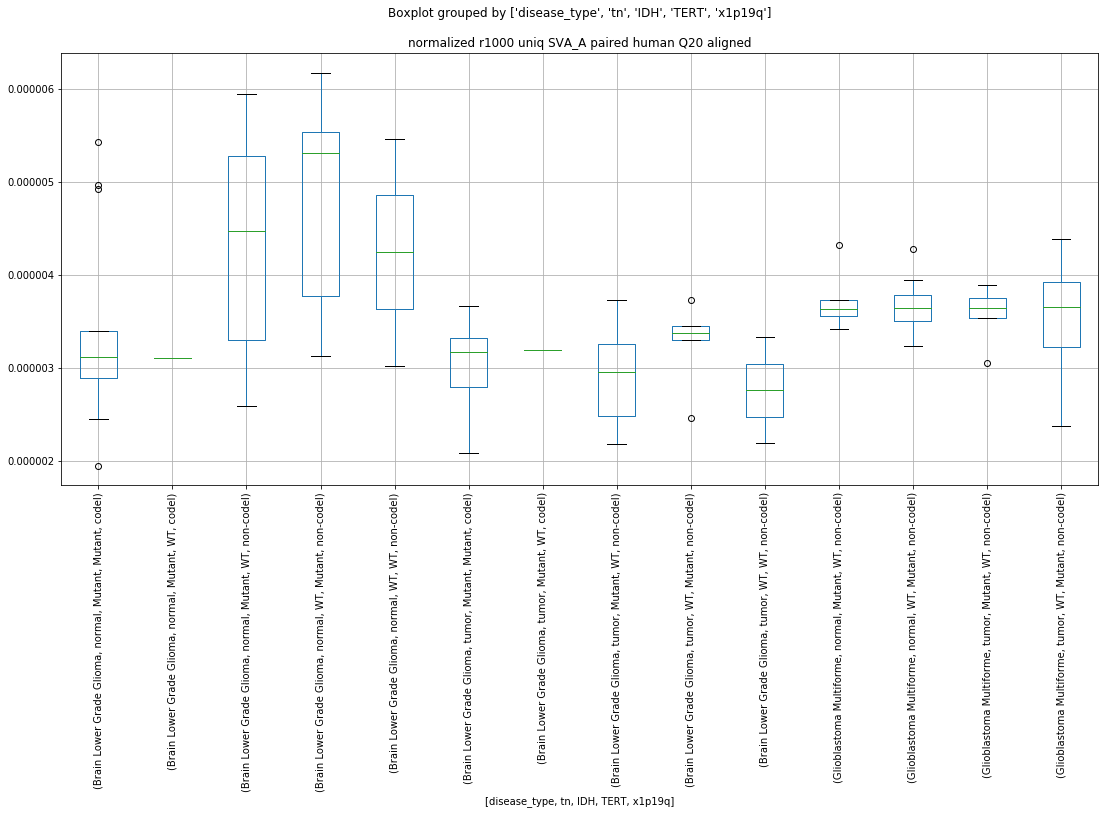

SVA_A:r10000 


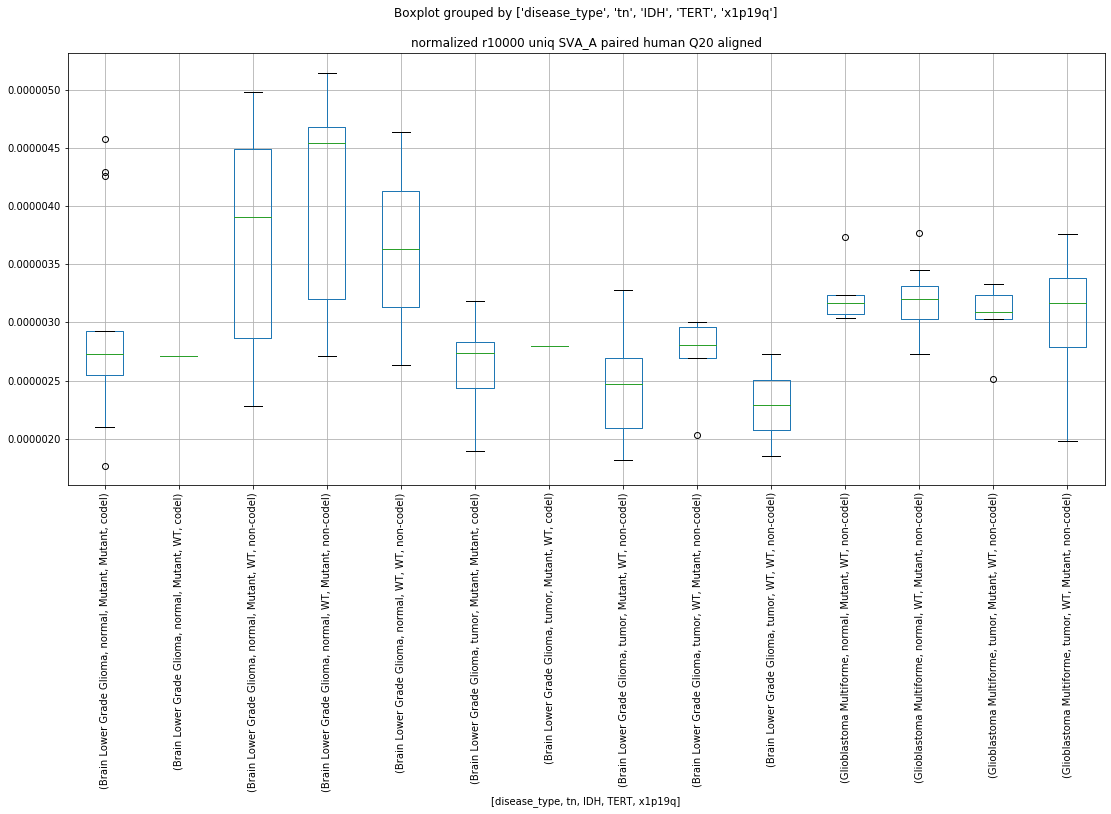

SVA_B:


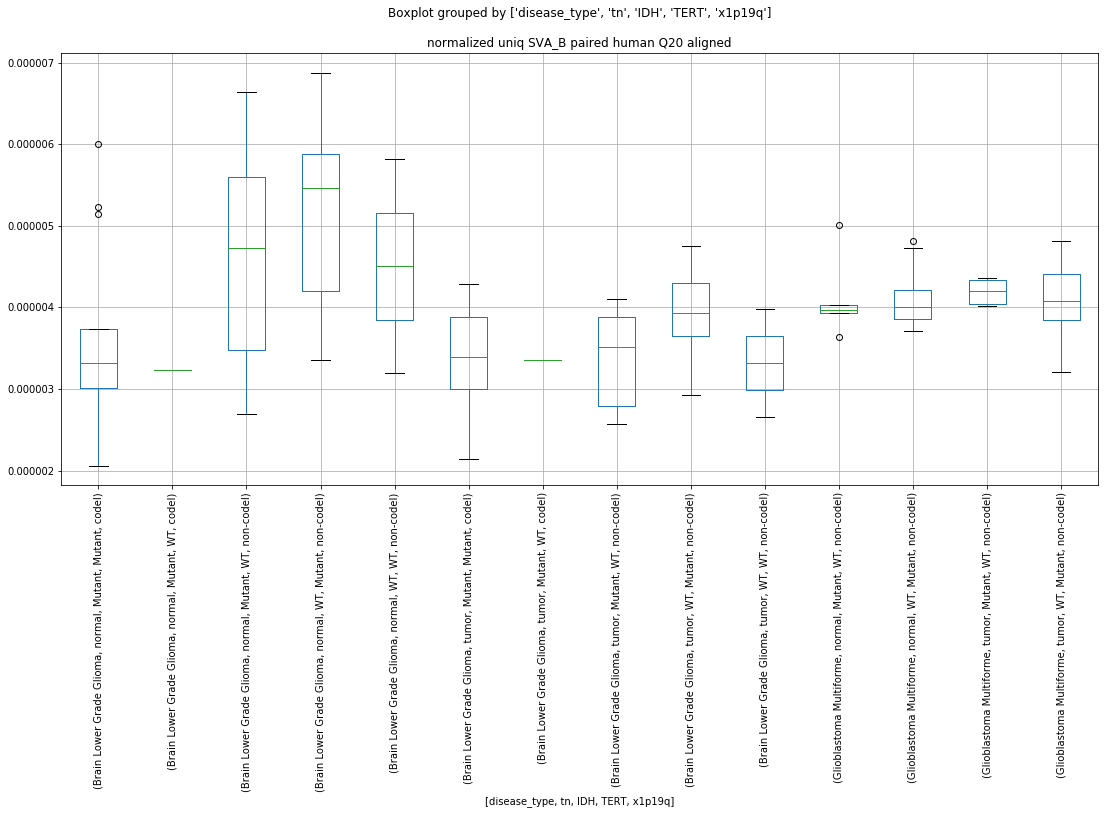

SVA_B:r10 


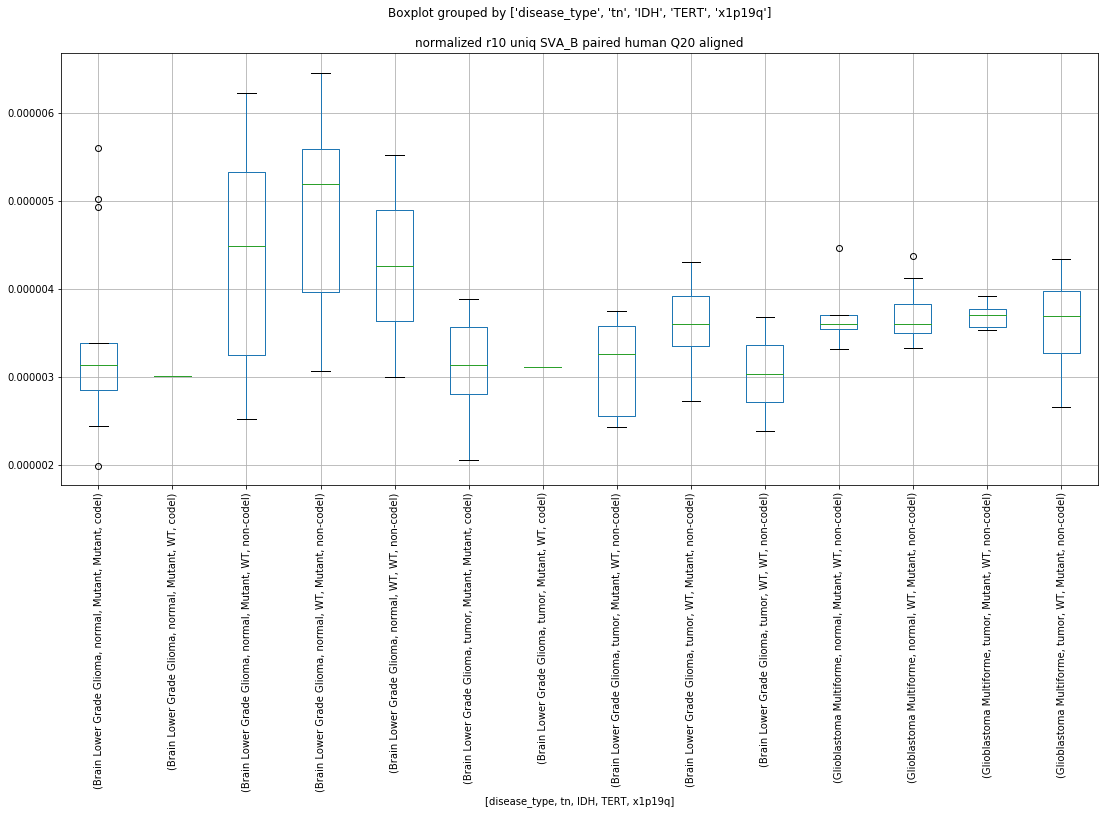

SVA_B:r100 


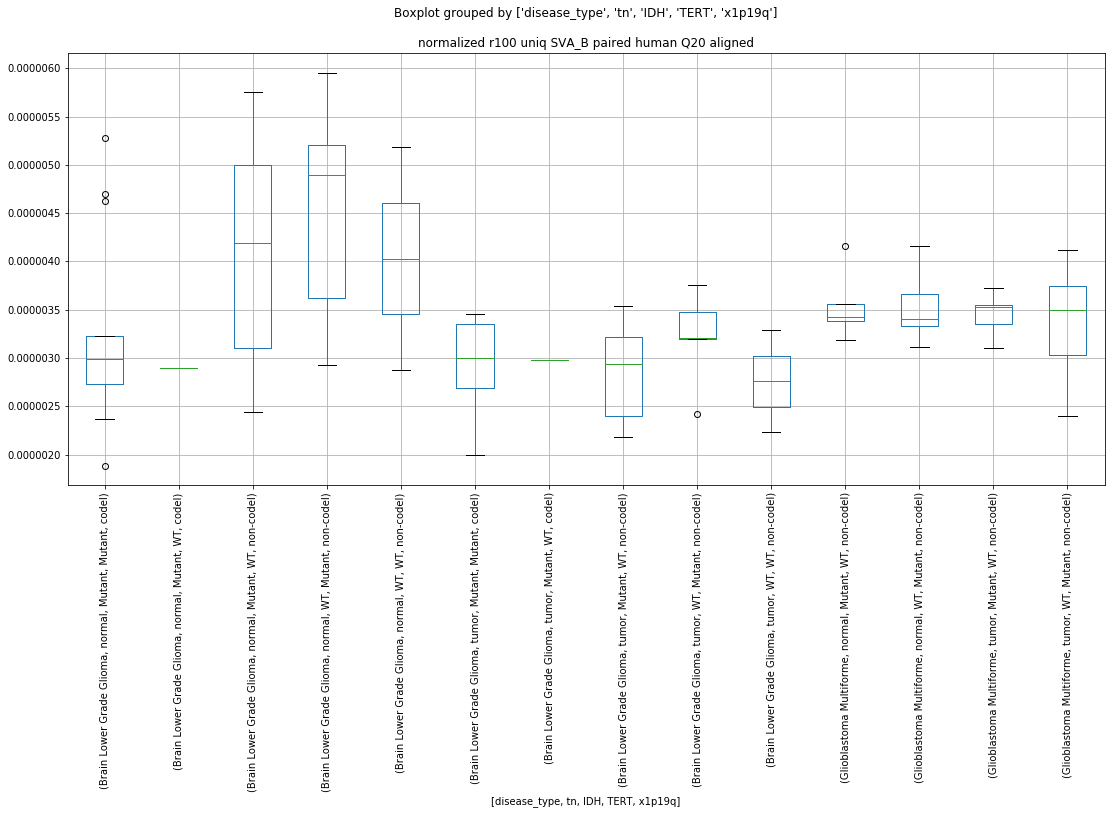

SVA_B:r1000 


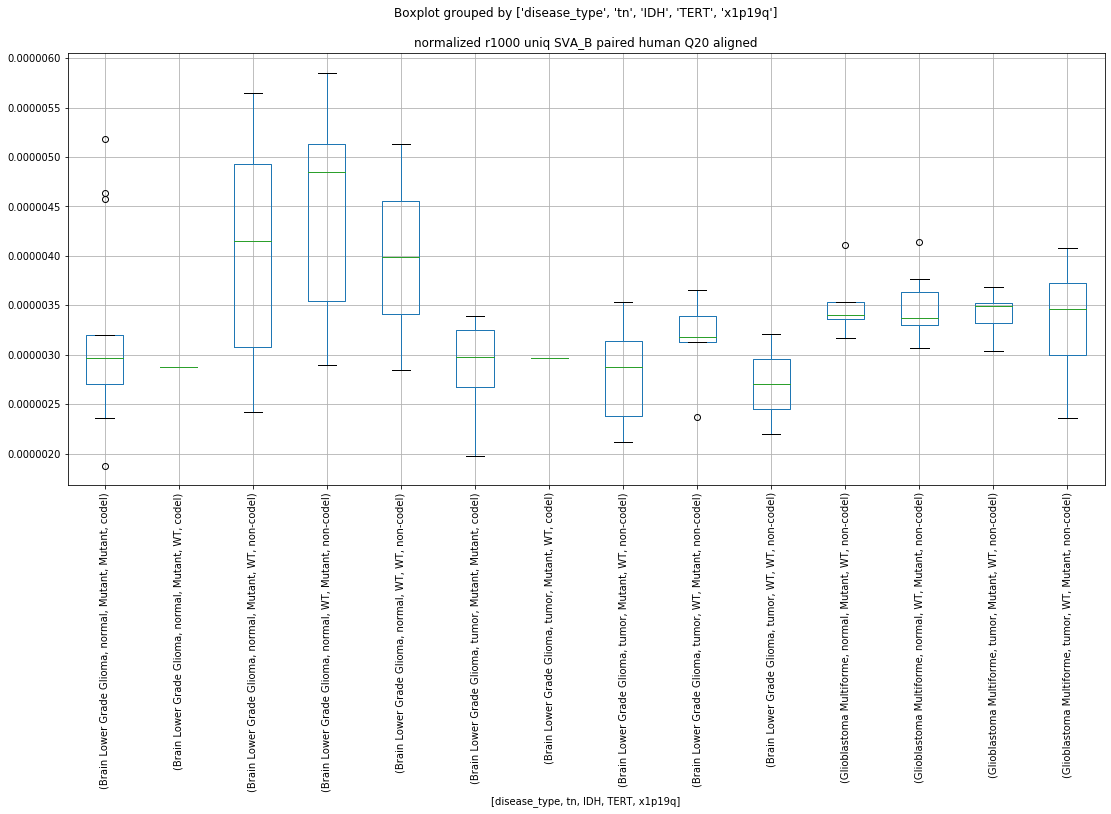

SVA_B:r10000 


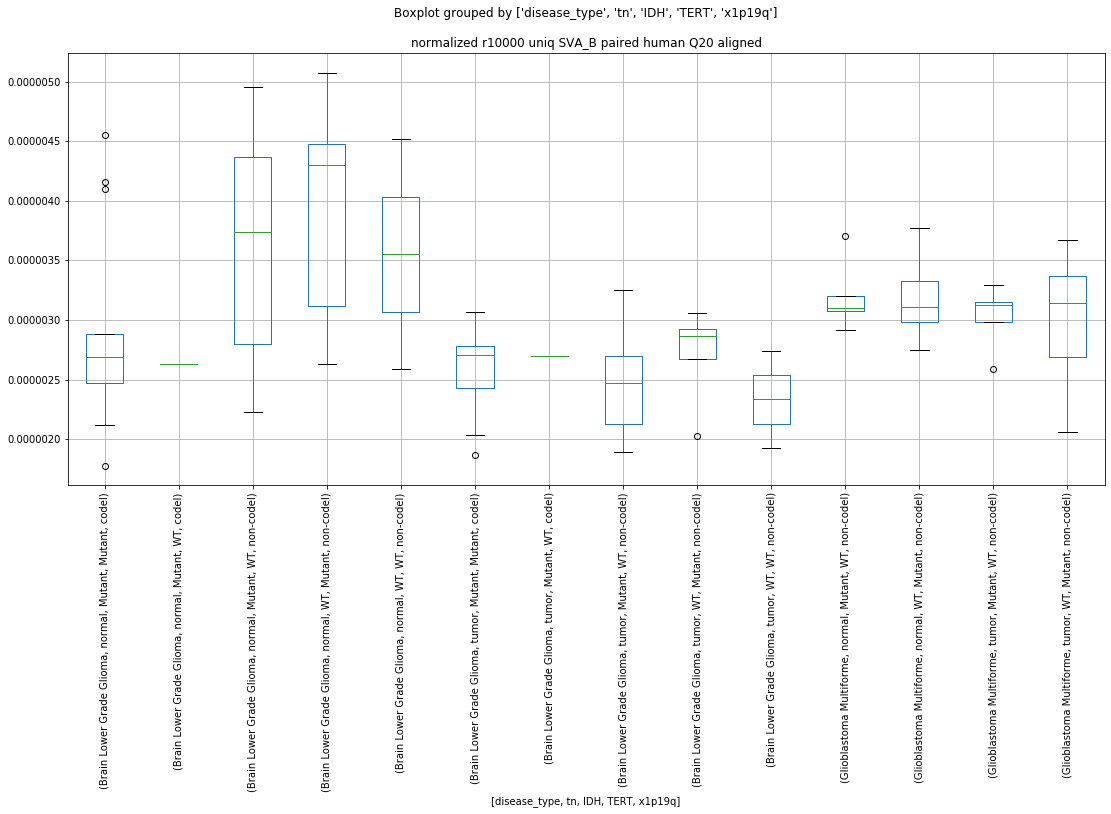

SVA_C:


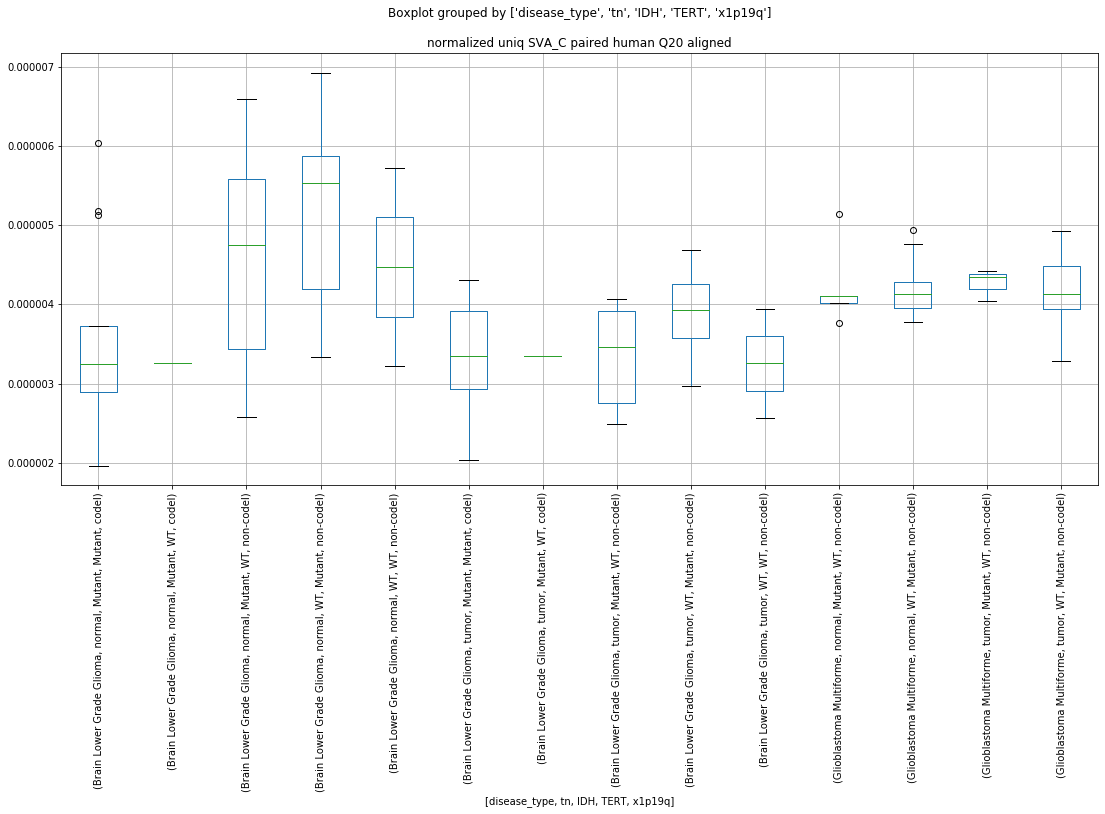

SVA_C:r10 


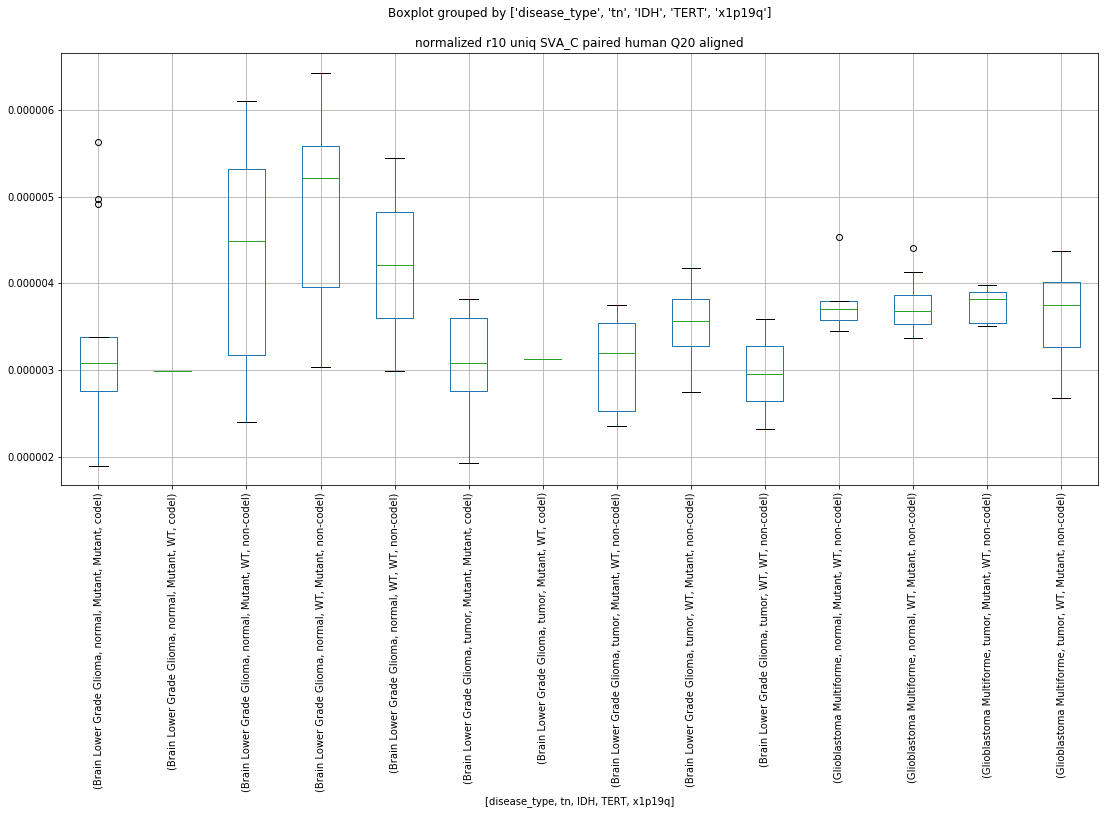

SVA_C:r100 


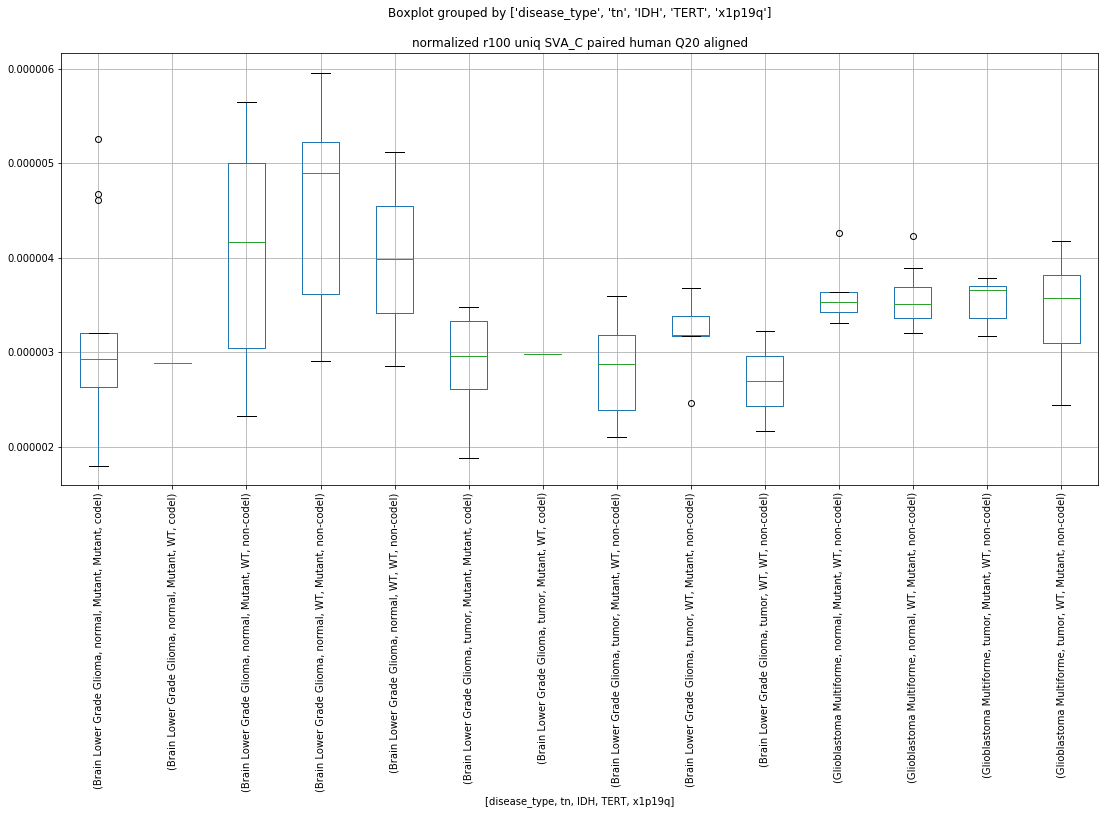

SVA_C:r1000 


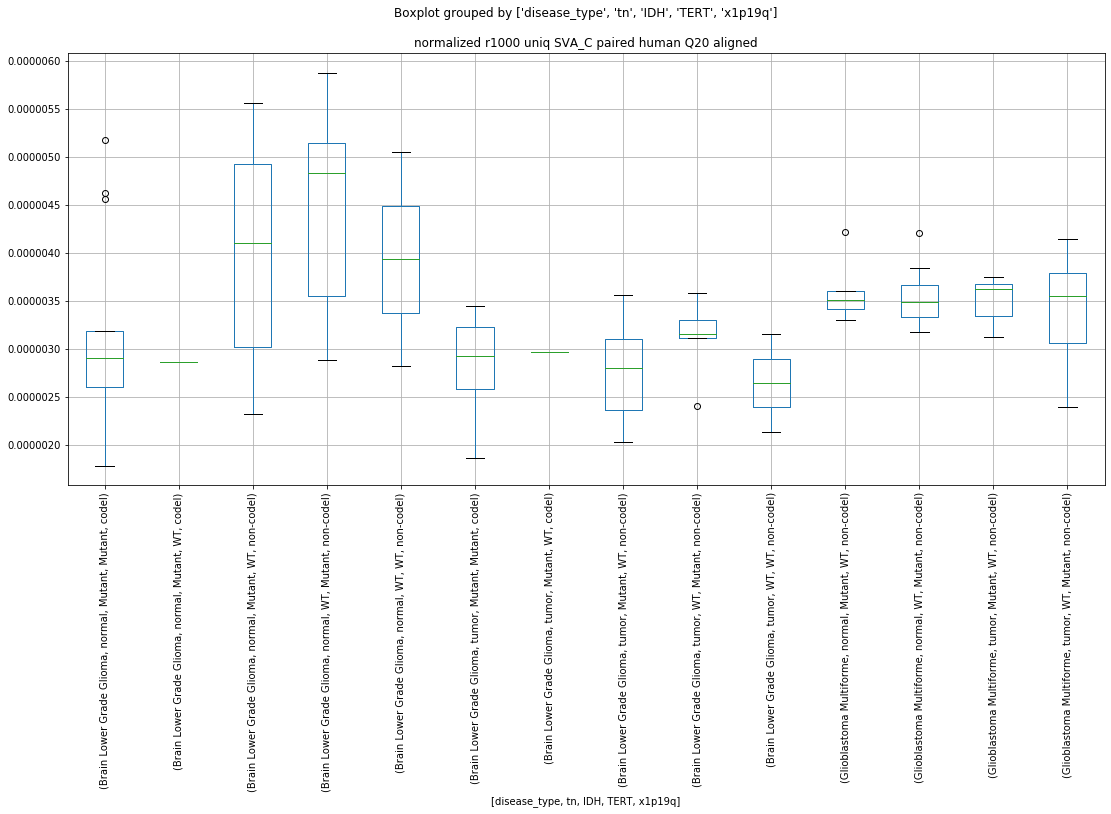

SVA_C:r10000 


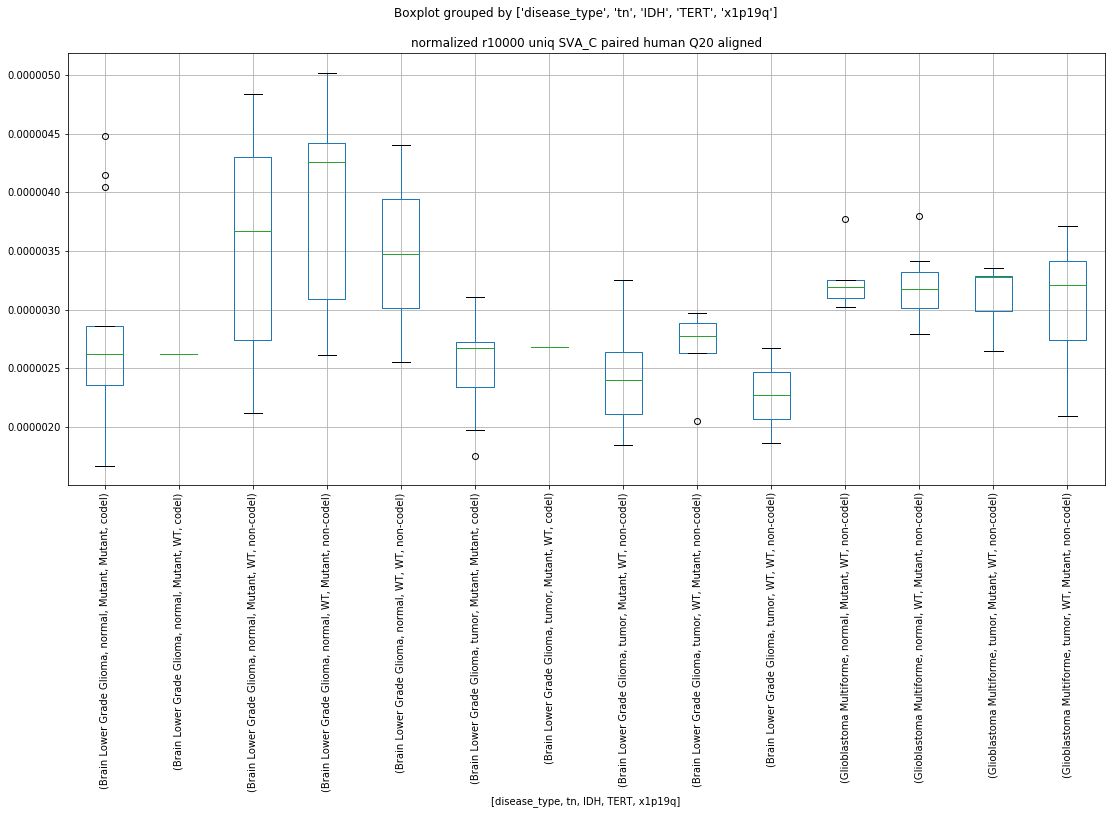

SVA_D:


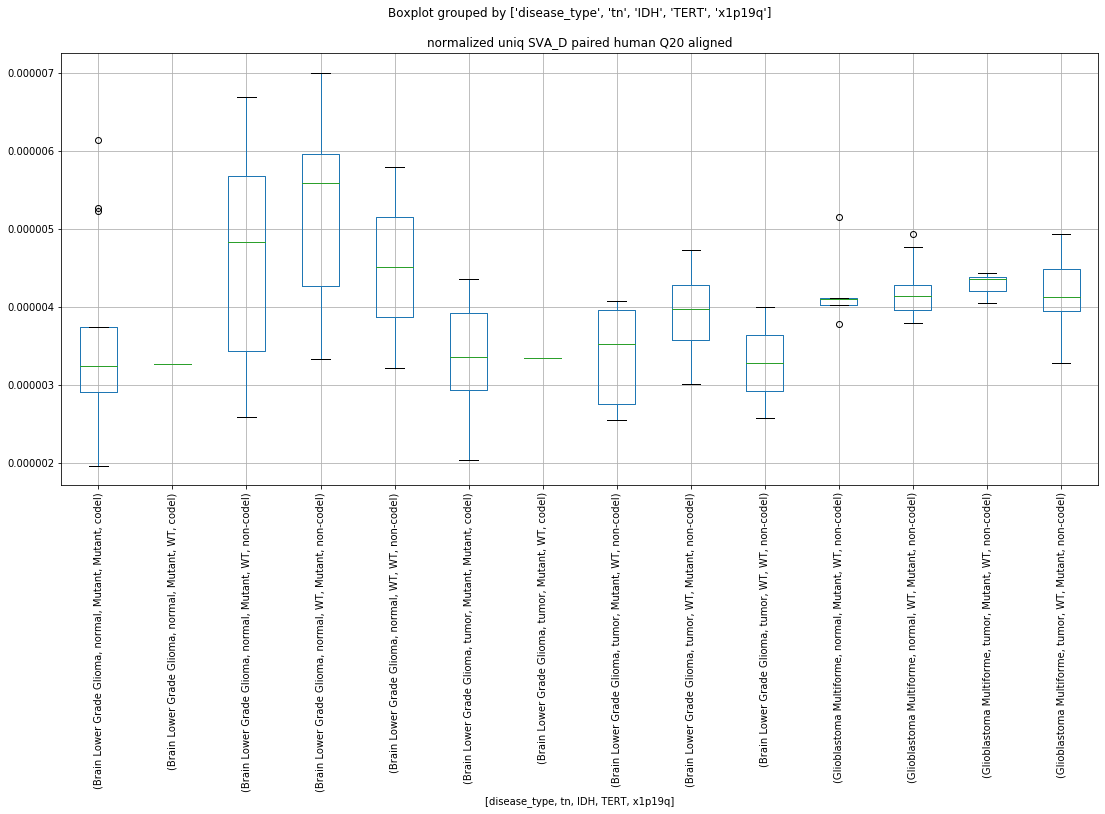

SVA_D:r10 


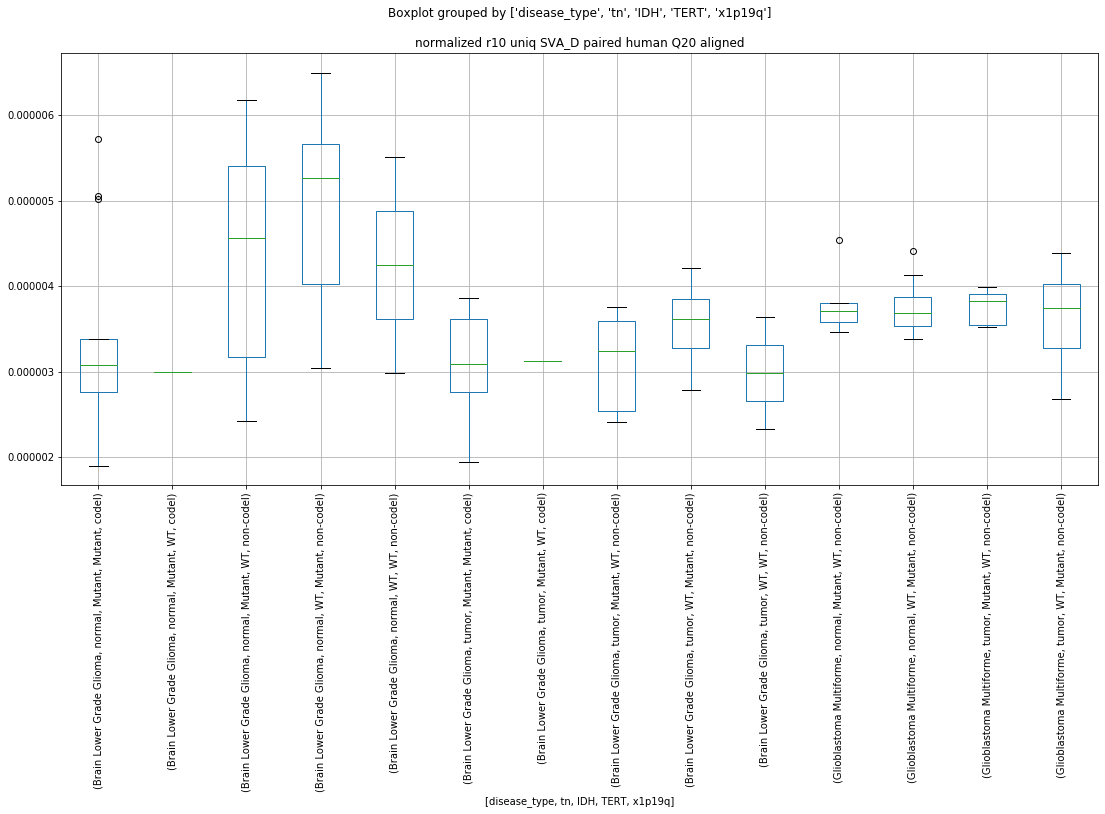

SVA_D:r100 


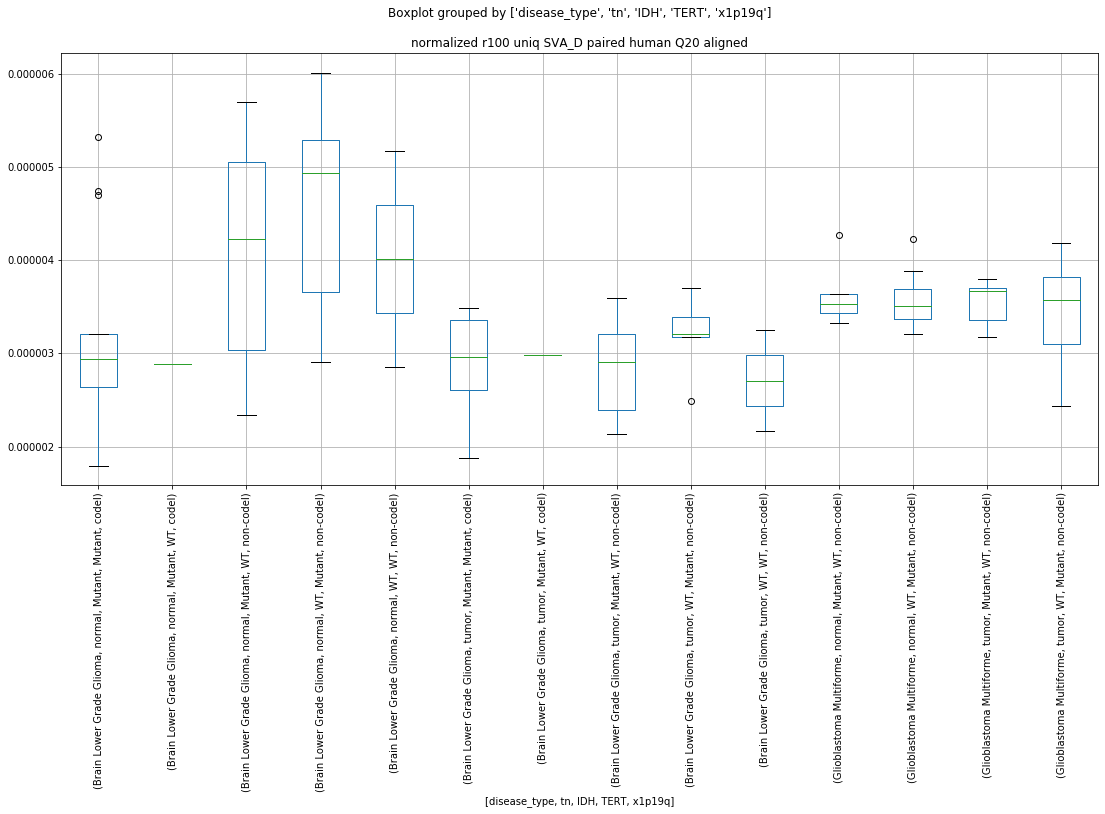

SVA_D:r1000 


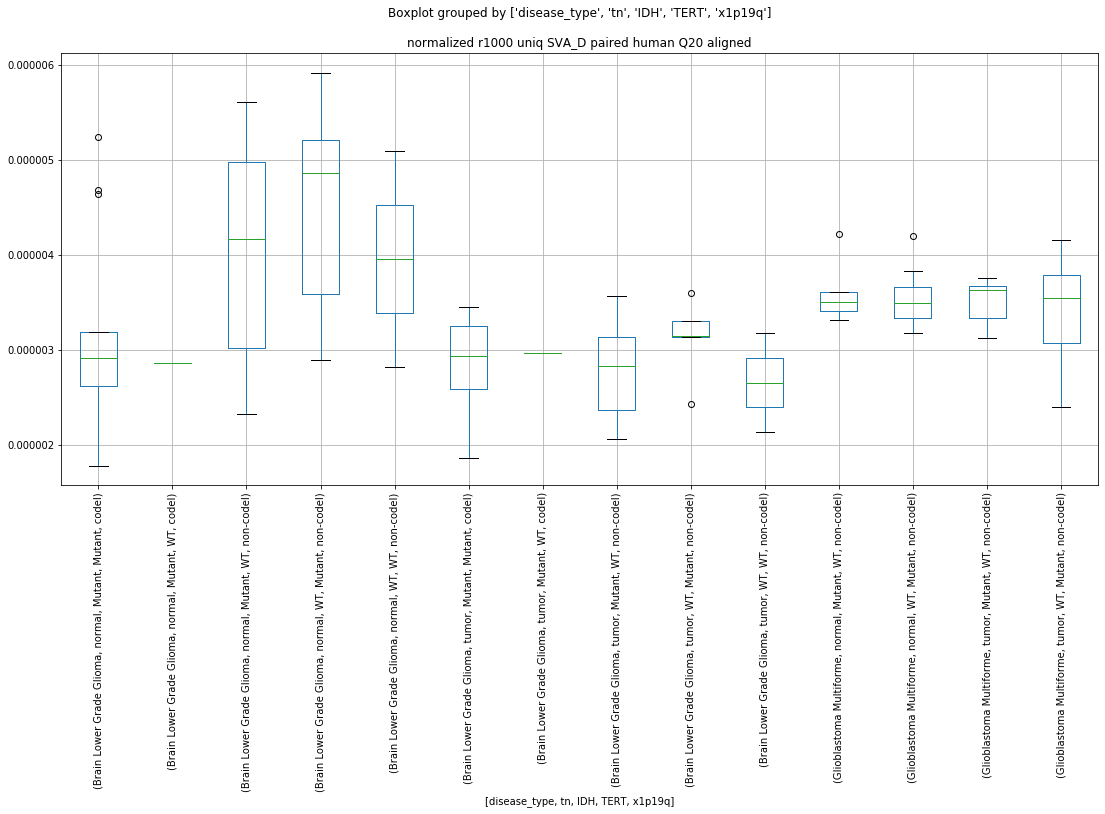

SVA_D:r10000 


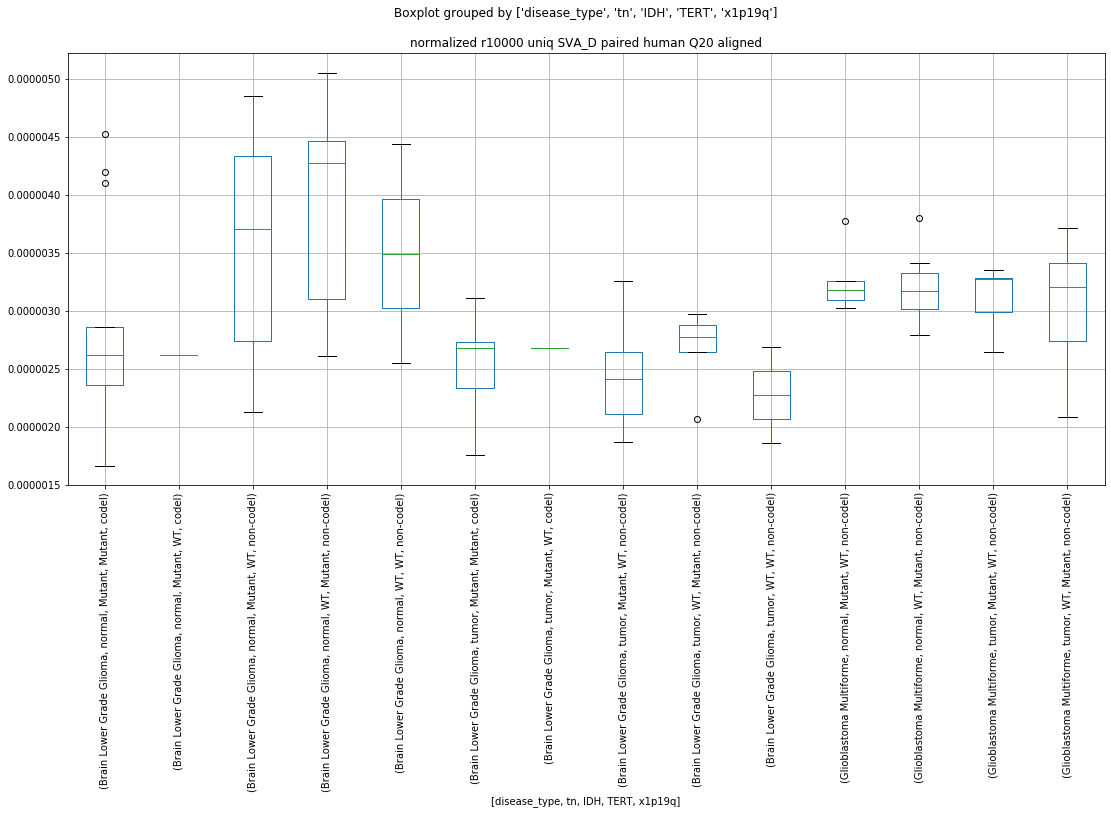

SVA_E:


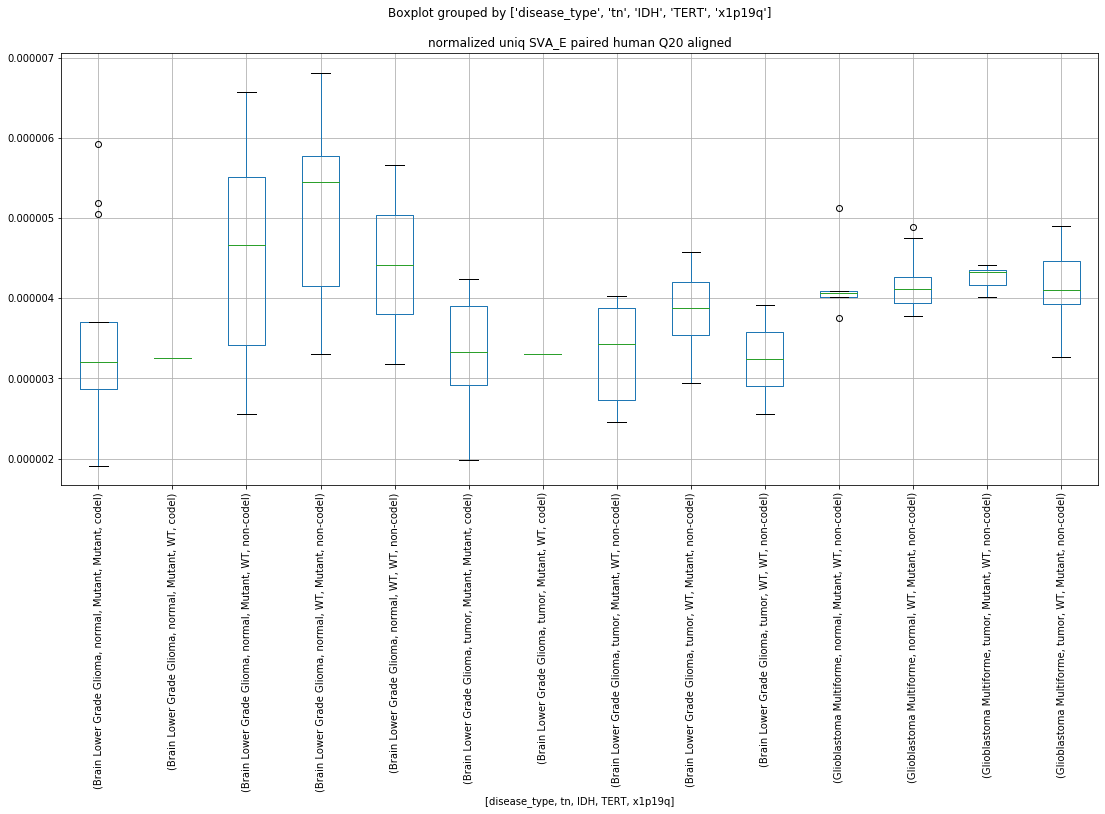

SVA_E:r10 


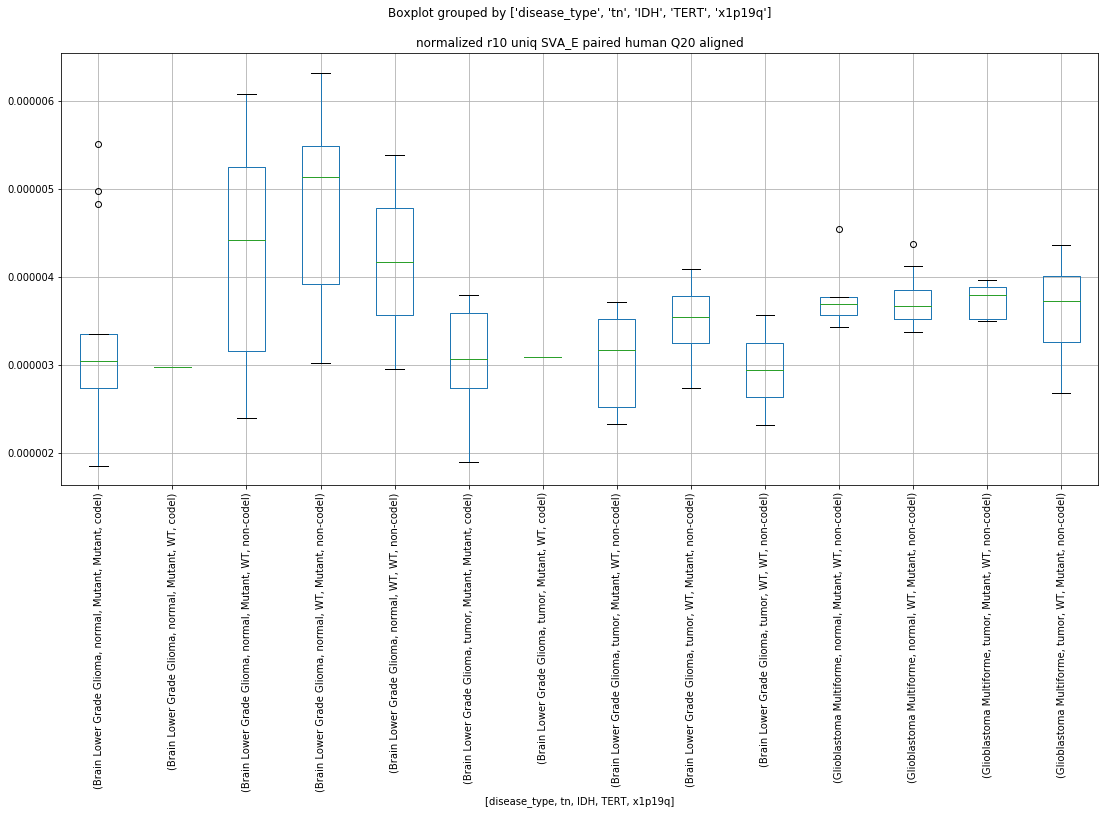

SVA_E:r100 


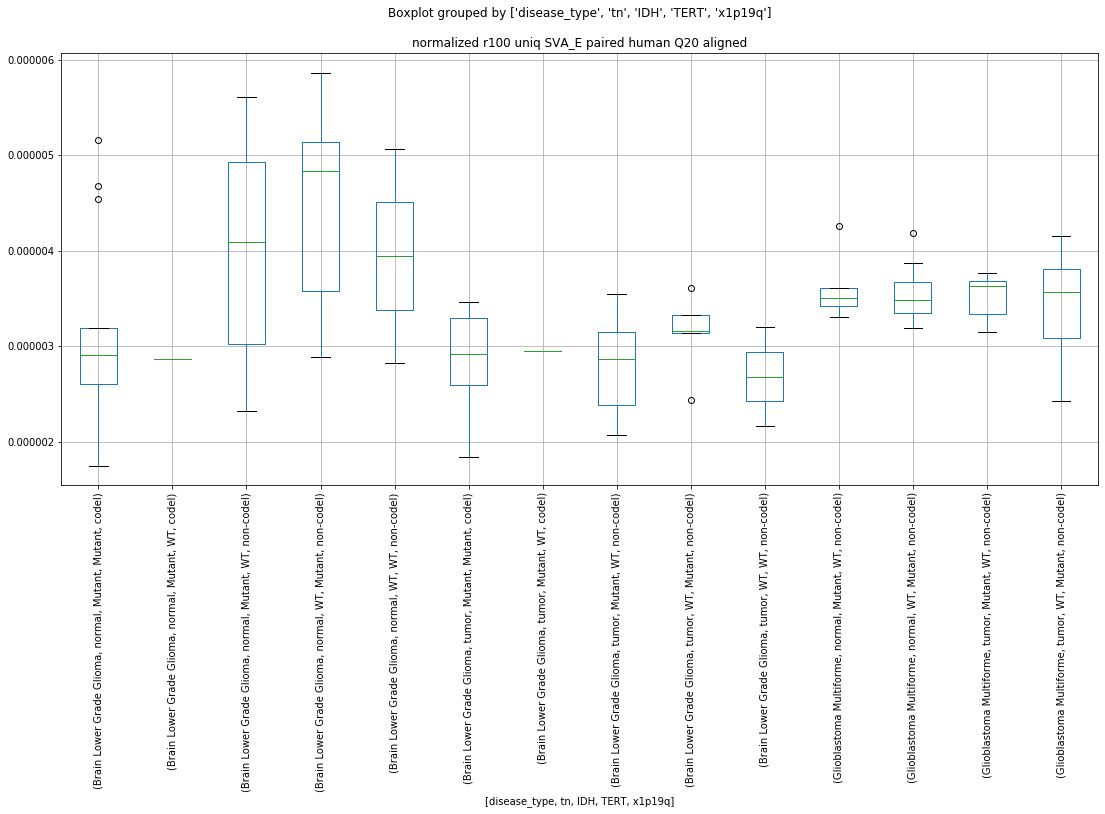

SVA_E:r1000 


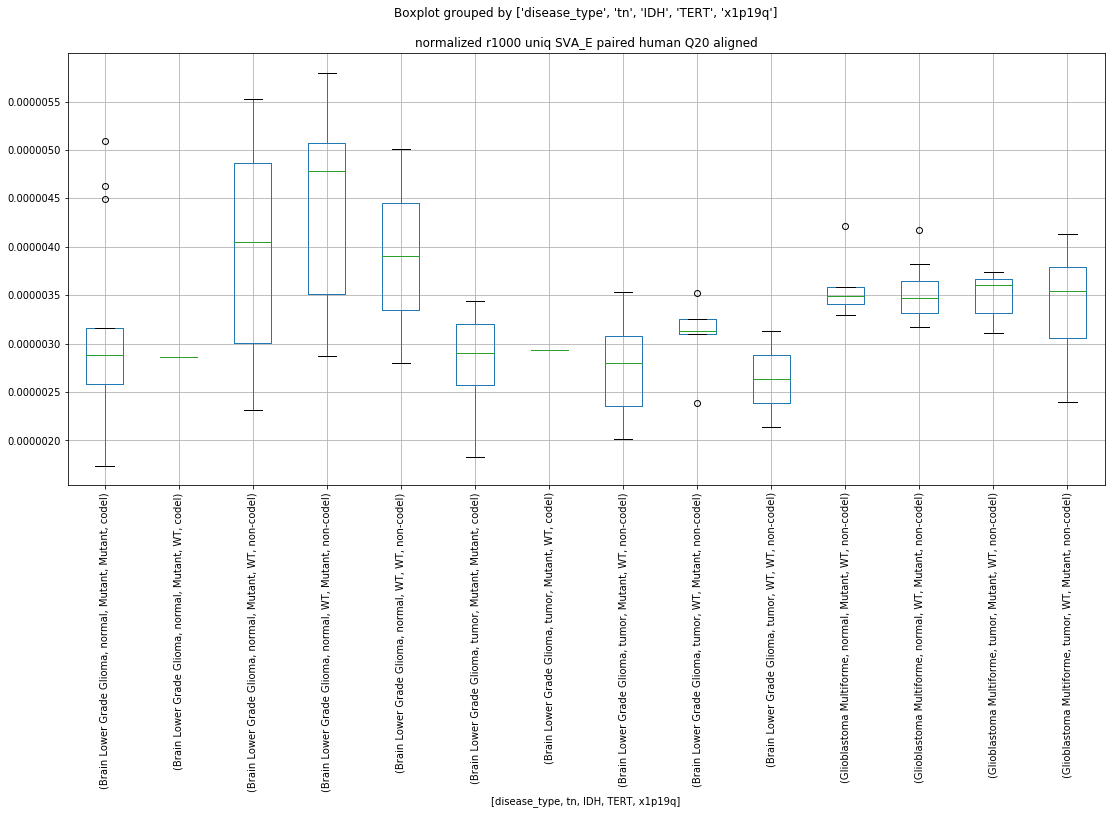

SVA_E:r10000 


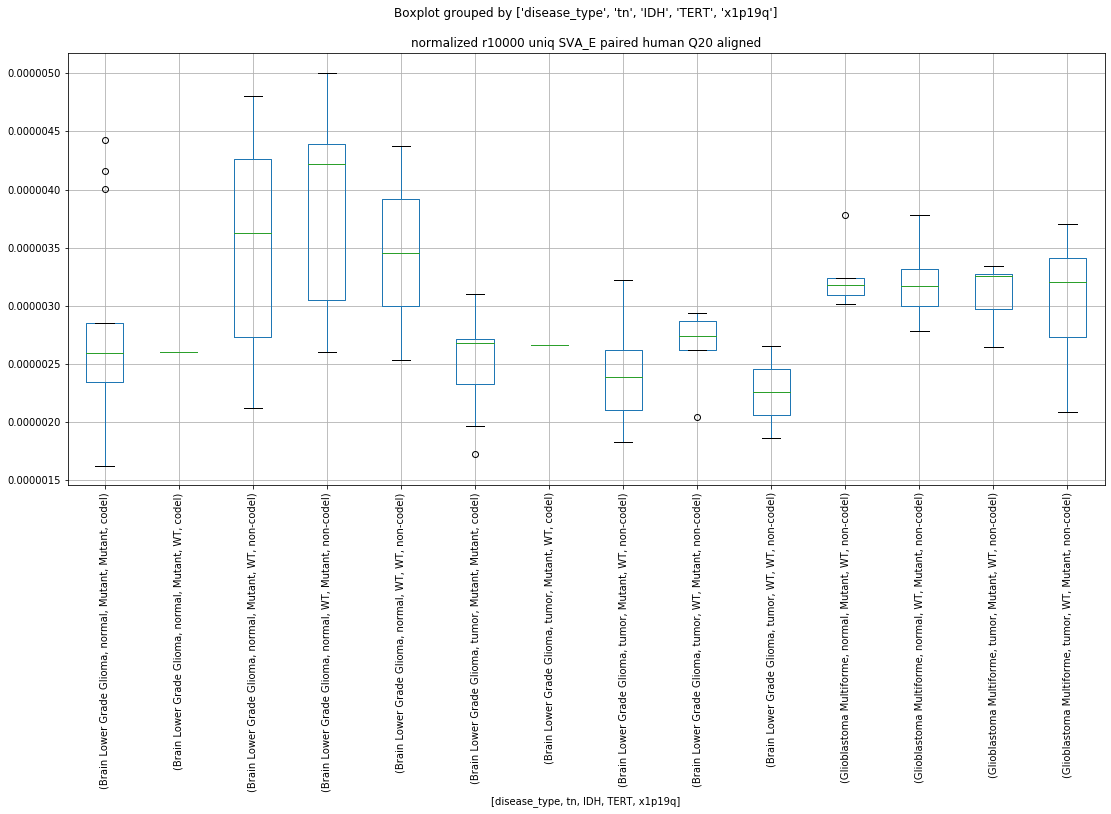

SVA_F:


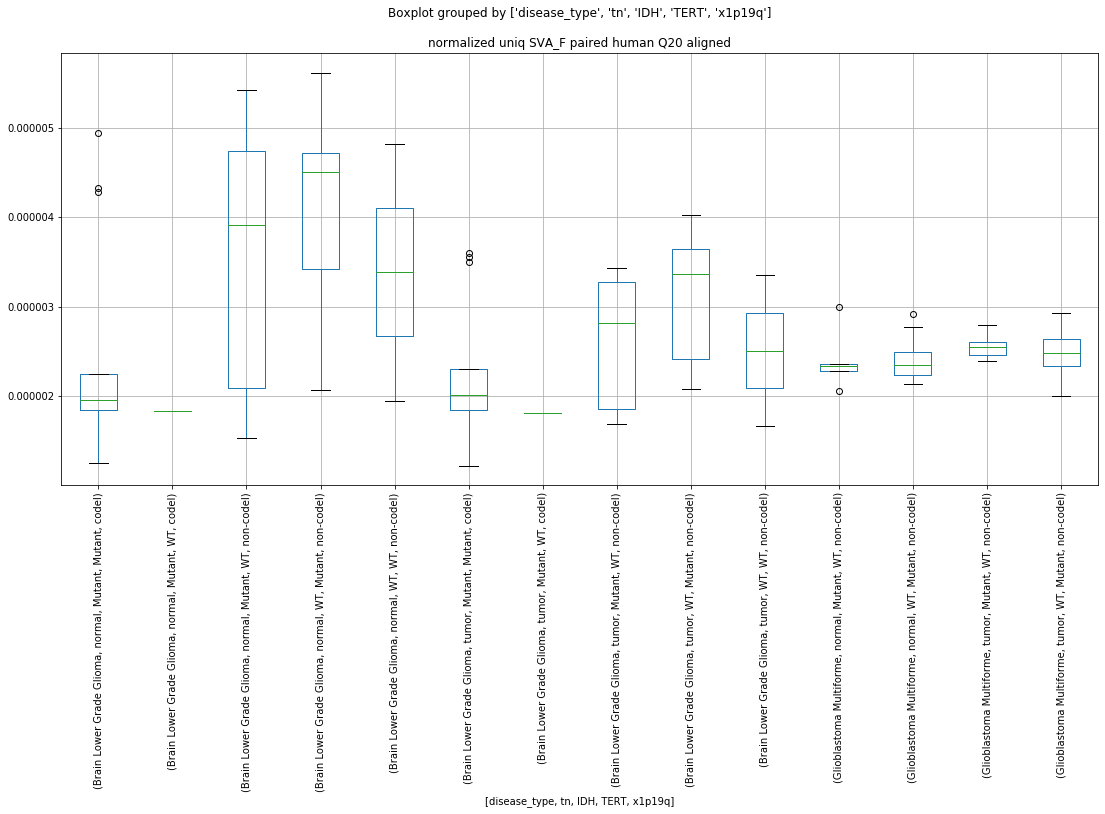

SVA_F:r10 


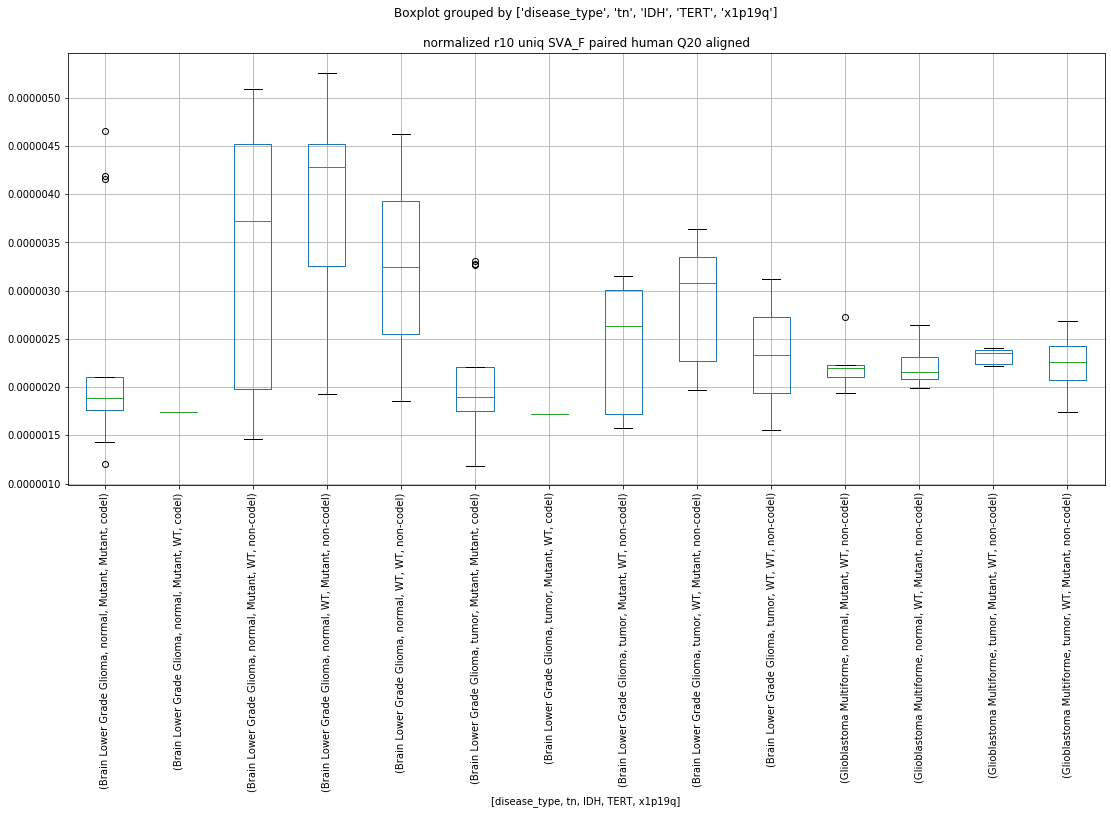

SVA_F:r100 


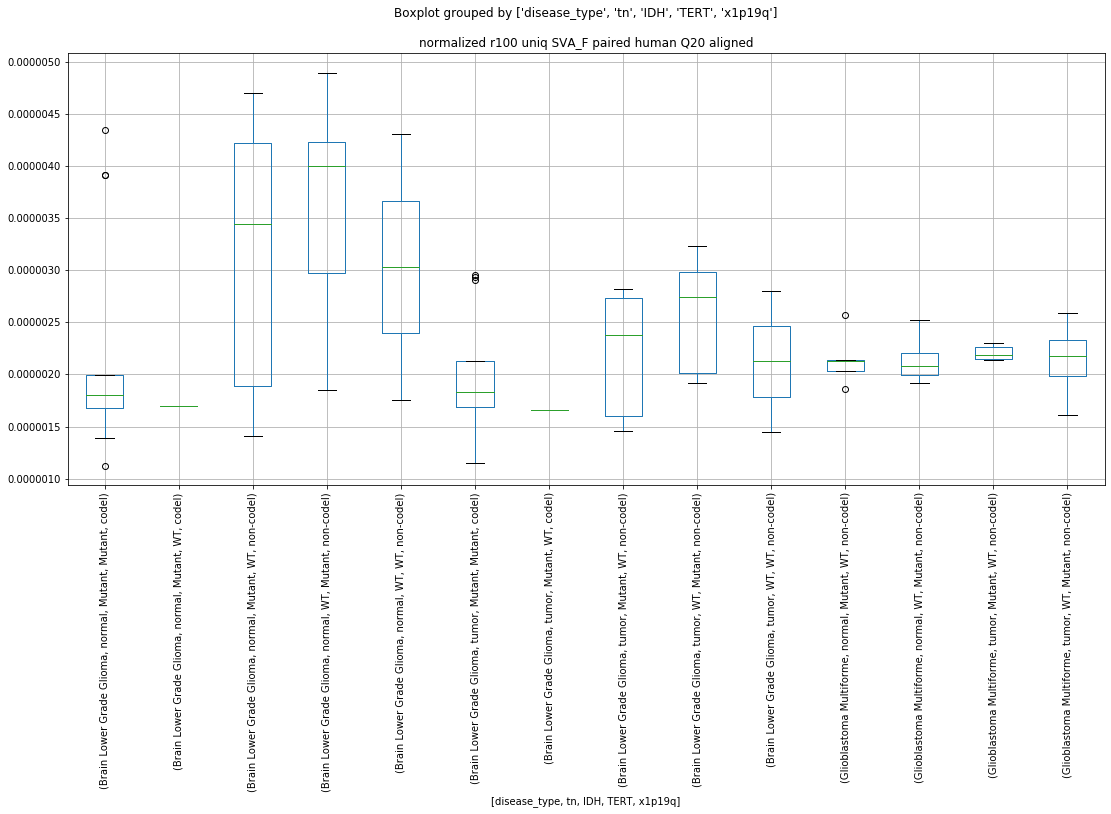

SVA_F:r1000 


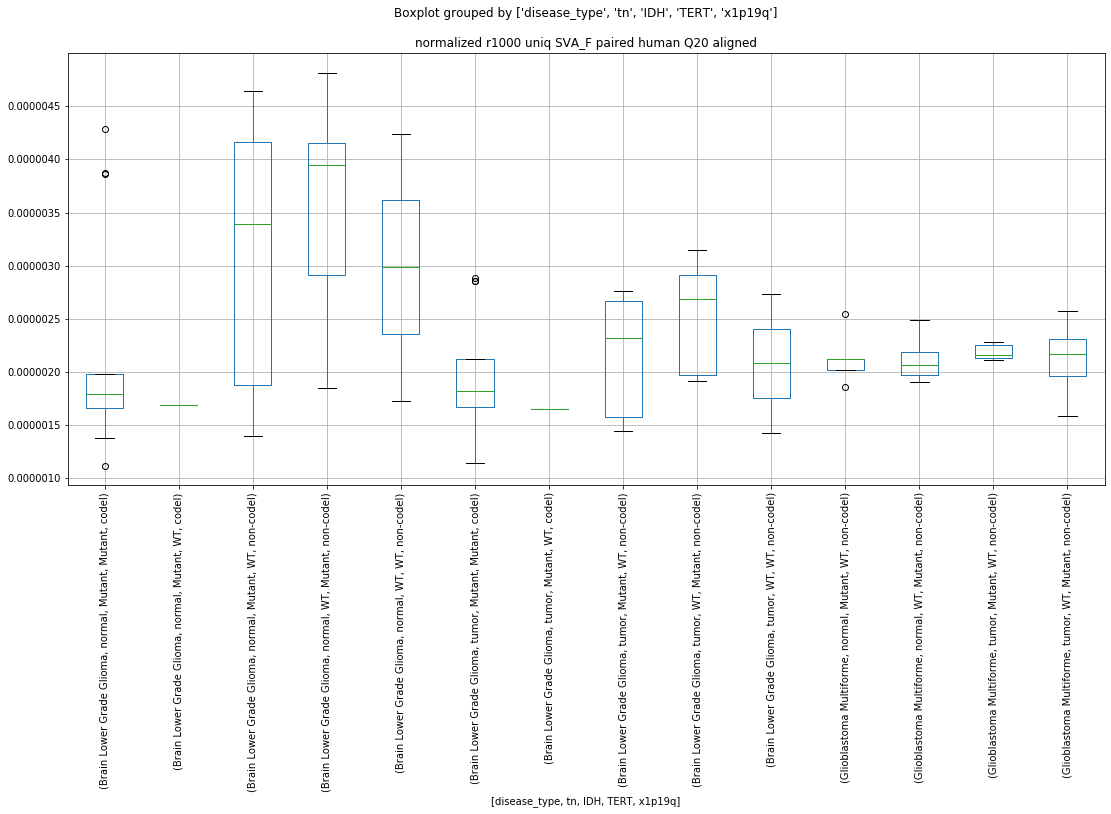

SVA_F:r10000 


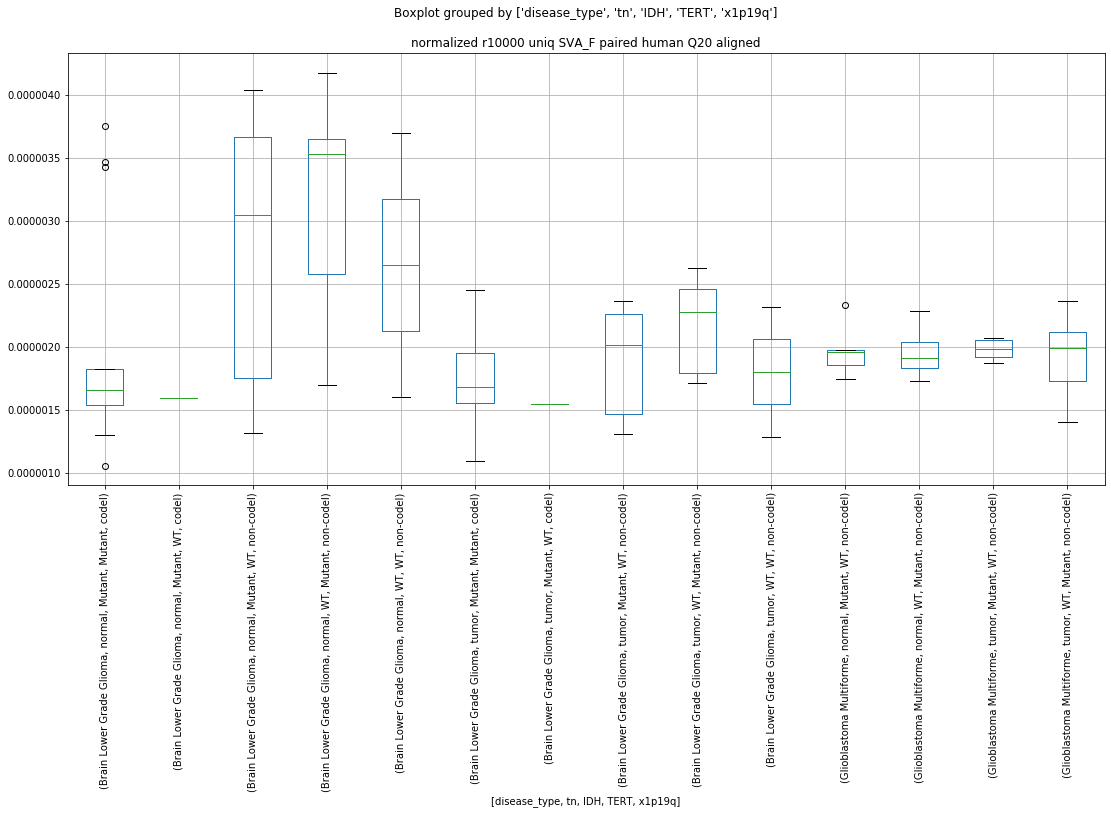

In [86]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+":"+s)
        df.boxplot(column=['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
                by=['disease_type','tn','IDH','TERT','x1p19q'])
        plt.xticks(rotation=90)
        plt.show()

In [87]:
import numpy as np
np.__version__

'1.19.5'

In [88]:
import scipy
scipy.__version__

'1.5.4'

In [89]:
from scipy import stats

In [90]:
## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

In [91]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 5.771943276592046
p = 1.8038957002360715e-05


# Tumor/Normal T-Tests

In [92]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            tn['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_normal'],
            tn['normalized '+s+'uniq '+hkle+' paired human Q20 aligned_tumor'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))



HERVK113 : 
	t = 2.9303238960533085
	p = 0.0039389341914798605
HERVK113 : r10 
	t = 3.081923842405112
	p = 0.0024649672835740173
HERVK113 : r100 
	t = 3.1410339650027126
	p = 0.0020436622495971844
HERVK113 : r1000 
	t = 3.1549950937356193
	p = 0.0019544199859405117
HERVK113 : r10000 
	t = 3.2558580910032733
	p = 0.0014094919813696597

SVA_A : 
	t = 3.7689166956364244
	p = 0.00023850583042881227
SVA_A : r10 
	t = 4.571108051655706
	p = 1.0356414148465898e-05
SVA_A : r100 
	t = 4.981819650093097
	p = 1.7797180318534032e-06
SVA_A : r1000 
	t = 5.03526408017964
	p = 1.4051065448185872e-06
SVA_A : r10000 
	t = 5.546037313591805
	p = 1.3577191117593655e-07

SVA_B : 
	t = 3.325850292525995
	p = 0.0011185224577470027
SVA_B : r10 
	t = 3.9495075144306018
	p = 0.00012214261364691057
SVA_B : r100 
	t = 4.578599955783315
	p = 1.0038005272083403e-05
SVA_B : r1000 
	t = 4.691359330607864
	p = 6.24808536211056e-06
SVA_B : r10000 
	t = 5.319067915390726
	p = 3.901284949187934e-07

SVA_C : 
	t = 3.272

1-   Total HERV/SVA load: We should examine the total load of HERV and SVA insertions together and separated by type (HERV-K, SVA-A,SVA-B, etc), in terms of clinical factors (subtype, age at Dx, etc), and survival (by subtype adjusted by age). We can just regress the total HERV/SVA load against the clinical variables and see if anything shows up.  
2-   Specific HERV/SVA locations: We will run into small numbers very quickly on this but its worth a shot. The primary question is- Are specific HERV/SVA insertions associated with glioma subtypes and/or poor outcomes?  
I think the simplest approach would be to take each location and run a simple statistical test by subtype compared to all other subtypes. For instance take a given insertion, say chr1:123,000, and test it in IDHmt against all other gliomas. We can iterate through all locations and subtypes. Then make a p-value cutoff that is reasonably strict to cull the majority of the data… and take a look!
Lets do all of these on the q30 data first to keep it simple. Lets also used the collapsed HERV/SVA locations to make sure we aren’t double counting, or making 2 locations where there is only one. I believe we did this at 1000bp groupings?

In [93]:
df.shape

(146, 126)

In [94]:
df['normalized uniq HERVK113 paired human Q20 aligned'].shape

(146,)

In [95]:
df[df['tn']=='normal'].shape

(73, 126)

In [96]:
df[df['tn']=='normal']['normalized uniq HERVK113 paired human Q20 aligned']

1      1.011559e-06
3      1.085933e-06
5      9.591912e-07
7      1.009477e-06
9      8.204327e-07
           ...     
239    1.130497e-06
241    2.546611e-06
243    2.249930e-06
245    2.644885e-06
247    2.515044e-06
Name: normalized uniq HERVK113 paired human Q20 aligned, Length: 73, dtype: float64

In [97]:
df[df['tn']=='normal']['normalized uniq HERVK113 paired human Q20 aligned'].shape

(73,)

In [98]:
df[df['tn']=='normal']['IDH'].value_counts()

Mutant    37
WT        35
Name: IDH, dtype: int64

In [99]:
df[((df['tn']=='normal') & (df['IDH']=='Mutant'))].shape

(37, 126)

# Mutant comparison

In [100]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['IDH']=='Mutant'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['IDH']=='WT'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 2.7030101666888897
	p = 0.008617013391386758
HERVK113 : r10 
	t = 2.680044483338612
	p = 0.009170666308164072
HERVK113 : r100 
	t = 2.6577814717512753
	p = 0.00973814890011071
HERVK113 : r1000 
	t = 2.6665218234681163
	p = 0.009511650700555674
HERVK113 : r10000 
	t = 2.690812564739944
	p = 0.008907152642071096

SVA_A : 
	t = -0.41476157111191125
	p = 0.6795848543739993
SVA_A : r10 
	t = 0.1893077258159072
	p = 0.850399476002643
SVA_A : r100 
	t = 0.23511053078818422
	p = 0.8148093743981935
SVA_A : r1000 
	t = 0.21738257830865712
	p = 0.8285425916615294
SVA_A : r10000 
	t = 0.19951448558945367
	p = 0.8424387460232565

SVA_B : 
	t = -0.24072673112122006
	p = 0.8104705819807995
SVA_B : r10 
	t = 0.26074150752561753
	p = 0.7950573893087443
SVA_B : r100 
	t = 0.25953102462306876
	p = 0.7959873196771082
SVA_B : r1000 
	t = 0.24549940215920263
	p = 0.8067881218369017
SVA_B : r10000 
	t = 0.16655073780412408
	p = 0.8682037143562987

SVA_C : 
	t = -0.5686961346357667
	p = 0.57

In [101]:
df[df['tn']=='normal']['TERT'].value_counts()

Mutant    47
WT        26
Name: TERT, dtype: int64

# TERT Comparison

In [102]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['TERT']=='Mutant'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['TERT']=='WT'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = -3.444984477001813
	p = 0.0009625145743297956
HERVK113 : r10 
	t = -3.4140877568913126
	p = 0.0010611209369415717
HERVK113 : r100 
	t = -3.4145190464415487
	p = 0.0010596810613782016
HERVK113 : r1000 
	t = -3.4141012533235755
	p = 0.0010610758506217355
HERVK113 : r10000 
	t = -3.398517562294372
	p = 0.0011143576494202013

SVA_A : 
	t = -1.8048919529221923
	p = 0.07533182477287113
SVA_A : r10 
	t = -2.1639442976113483
	p = 0.0338343211654838
SVA_A : r100 
	t = -2.2033316038140907
	p = 0.030817017989040678
SVA_A : r1000 
	t = -2.191039225656365
	p = 0.03173232952250444
SVA_A : r10000 
	t = -2.1750930977985203
	p = 0.03295511866239739

SVA_B : 
	t = -1.8534924653844447
	p = 0.06796658930941644
SVA_B : r10 
	t = -2.1684476932182375
	p = 0.03347674395370405
SVA_B : r100 
	t = -2.18531529753539
	p = 0.032166606623639155
SVA_B : r1000 
	t = -2.1817207110052665
	p = 0.032441980648250976
SVA_B : r10000 
	t = -2.14347113895435
	p = 0.03550228288707288

SVA_C : 
	t = -1.67870975

In [103]:
df[df['tn']=='normal']['x1p19q'].value_counts()

non-codel    59
codel        14
Name: x1p19q, dtype: int64

# 1p19q Comparison

In [104]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['x1p19q']=='non-codel'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['x1p19q']=='codel'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 0.24068460308279474
	p = 0.8104932159395049
HERVK113 : r10 
	t = 0.23256389278116257
	p = 0.8167691605479546
HERVK113 : r100 
	t = 0.25430243877436504
	p = 0.7999969853905238
HERVK113 : r1000 
	t = 0.24358733387081158
	p = 0.8082528847315009
HERVK113 : r10000 
	t = 0.21074563956775505
	p = 0.8336894370184258

SVA_A : 
	t = 2.8824129763984003
	p = 0.005217556837711583
SVA_A : r10 
	t = 2.336351634271271
	p = 0.022300241942078542
SVA_A : r100 
	t = 2.300177056420411
	p = 0.02438040775335801
SVA_A : r1000 
	t = 2.309045032183628
	p = 0.02385516898398868
SVA_A : r10000 
	t = 2.324639044332575
	p = 0.02295582571684196

SVA_B : 
	t = 2.70797525814673
	p = 0.008475814570057152
SVA_B : r10 
	t = 2.286126506604038
	p = 0.025233570860151357
SVA_B : r100 
	t = 2.276704472573791
	p = 0.02582036648649987
SVA_B : r1000 
	t = 2.2883613040001207
	p = 0.025096131111890733
SVA_B : r10000 
	t = 2.3510530155980733
	p = 0.021500929370679114

SVA_C : 
	t = 3.0030460757551483
	p = 0.0036890

In [105]:
df[df['tn']=='normal']['disease_type'].value_counts()

Brain Lower Grade Glioma    39
Glioblastoma Multiforme     34
Name: disease_type, dtype: int64

# Disease Type Comparison

In [106]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['disease_type']=='Brain Lower Grade Glioma'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['disease_type']=='Glioblastoma Multiforme'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = 6.0757298684229415
	p = 5.5242447381818576e-08
HERVK113 : r10 
	t = 6.042011687442644
	p = 6.34215193012243e-08
HERVK113 : r100 
	t = 5.993400982929978
	p = 7.736126051846134e-08
HERVK113 : r1000 
	t = 5.992997322524114
	p = 7.748885566217582e-08
HERVK113 : r10000 
	t = 6.004915309767722
	p = 7.380782308063169e-08

SVA_A : 
	t = 0.939683231914756
	p = 0.3505660467292433
SVA_A : r10 
	t = 1.8379878789451323
	p = 0.07024764661772112
SVA_A : r100 
	t = 1.8858384772999974
	p = 0.06340764008336425
SVA_A : r1000 
	t = 1.863312767424033
	p = 0.06655423880415544
SVA_A : r10000 
	t = 1.7418296793791397
	p = 0.085868984246528

SVA_B : 
	t = 1.1682627938420465
	p = 0.24660869646651118
SVA_B : r10 
	t = 1.9047102039374155
	p = 0.06086898096323031
SVA_B : r100 
	t = 1.8606964460407378
	p = 0.06692808340513536
SVA_B : r1000 
	t = 1.8213556465154215
	p = 0.07276556824777887
SVA_B : r10000 
	t = 1.6198550469175421
	p = 0.10969701197115467

SVA_C : 
	t = 0.6841113052619544
	p = 0.4961

In [107]:
df[df['tn']=='normal']['gender_mt'].value_counts()

male      41
female    32
Name: gender_mt, dtype: int64

# Gender comparison

In [108]:
for hkle in "HERVK113","SVA_A","SVA_B","SVA_C","SVA_D","SVA_E","SVA_F":
    print()
    for s in "","r10 ","r100 ","r1000 ","r10000 ":
        print(hkle+" : "+s)                
        t, p = stats.ttest_ind(
            df[((df['tn']=='normal') & (df['gender_mt']=='male'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'],
            df[((df['tn']=='normal') & (df['gender_mt']=='female'))]['normalized '+s+'uniq '+hkle+' paired human Q20 aligned'])
        print("\tt = " + str(t))
        print("\tp = " + str(p))


HERVK113 : 
	t = -1.5822867120839754
	p = 0.11802887944015926
HERVK113 : r10 
	t = -1.6099305322542061
	p = 0.11185053087332437
HERVK113 : r100 
	t = -1.6015163626346962
	p = 0.11370288316446812
HERVK113 : r1000 
	t = -1.5918519018411725
	p = 0.11586084023348708
HERVK113 : r10000 
	t = -1.6076592740817102
	p = 0.11234812948316558

SVA_A : 
	t = -1.1728179046943037
	p = 0.24478871752740472
SVA_A : r10 
	t = -1.3177299048195998
	p = 0.19183026015717625
SVA_A : r100 
	t = -1.3430501106397765
	p = 0.18353336145830146
SVA_A : r1000 
	t = -1.3362918213368555
	p = 0.1857208893665019
SVA_A : r10000 
	t = -1.191049213883613
	p = 0.23760087608086536

SVA_B : 
	t = -1.2881037825737083
	p = 0.20189208446971574
SVA_B : r10 
	t = -1.4122632897929042
	p = 0.16224065914549482
SVA_B : r100 
	t = -1.3805529186032914
	p = 0.17174734628093294
SVA_B : r1000 
	t = -1.3615453211591273
	p = 0.17764652525088853
SVA_B : r10000 
	t = -1.2105144762959714
	p = 0.2300959583969298

SVA_C : 
	t = -1.1325570548791042